# Phân Tích và Xử Lý Dữ Liệu Báo Điện Tử VnExpress

Notebook này sẽ trình bày kết quả phân tích hơn 1000 bài báo từ trang web VNExpress thuộc 2 phụ lục là Khoa học và Công nghệ.

- Biến mục tiêu:
- Biến đặc trưng:
  - title: string           
  - description: string        
  - date: datetime                
  - category: string           
  - content: string            
  - author: string             
  - tags: string               
  - group: string              
  - nums_of_comments: int  
  - url: string                
             



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Sem6/KHDL

/content/drive/MyDrive/Sem6/KHDL


In [ ]:
import os
os.listdir()

['vnexpress_congnghe_raw_data.csv',
 'vnexpress_khoahoc_raw_data.csv',
 'VnExpresss_CN.ipynb']

## Nhập thư viện và đọc dữ liệu


In [ ]:
import pandas as pd

In [ ]:
data_KH = pd.read_csv('vnexpress_khoahoc_raw_data.csv')
data_CN = pd.read_csv('vnexpress_congnghe_raw_data.csv')

### Kiểm tra dữ liệu bị thiếu thông tin và mô tả


In [ ]:
missing_values_KH = data_KH.isnull().sum() / len(data_KH) * 100
missing_values_CN = data_CN.isnull().sum() / len(data_CN) * 100
missing_values_KH, missing_values_CN

(title               0.000000
 description         0.344828
 date                0.344828
 category            0.000000
 content             0.000000
 author              0.000000
 tags                0.000000
 group               0.000000
 nums_of_comments    0.000000
 url                 0.000000
 dtype: float64,
 title                0.000000
 description          0.000000
 date                 0.000000
 category             9.271523
 content              0.496689
 author              41.721854
 tags                 0.000000
 group                0.000000
 nums_of_comments     0.000000
 url                  0.000000
 dtype: float64)

In [ ]:
data_KH.info()
data_CN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             580 non-null    object
 1   description       578 non-null    object
 2   date              578 non-null    object
 3   category          580 non-null    object
 4   content           580 non-null    object
 5   author            580 non-null    object
 6   tags              580 non-null    object
 7   group             580 non-null    object
 8   nums_of_comments  580 non-null    int64 
 9   url               580 non-null    object
dtypes: int64(1), object(9)
memory usage: 45.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             604 non-null    object
 1   description       604 non-null    object
 2 

In [ ]:
print(data_KH.describe())
print(data_CN.describe())

       nums_of_comments
count        580.000000
mean          17.463793
std           24.997625
min            0.000000
25%            2.000000
50%            8.000000
75%           22.000000
max          178.000000
       nums_of_comments
count        604.000000
mean          40.675497
std           59.379159
min            0.000000
25%            3.000000
50%           18.000000
75%           50.000000
max          389.000000


### Làm sạch dữ liệu

In [ ]:
data_KH = data_KH.drop(columns='thumbnail')
data_CN = data_CN.drop(columns='thumbnail')

#### Chuẩn hoá datetime

In [ ]:
import datetime
data_KH['date_clean'] = data_KH['date'].str.split(' ', n=2).str[2]
data_KH['date'] = pd.to_datetime(data_KH['date_clean'].str.replace(r' GMT7', '', regex=True),
                               format='%d%m%Y %H%M', errors='coerce')

data_CN['date_clean'] = data_CN['date'].str.split(' ', n=2).str[2]
data_CN['date'] = pd.to_datetime(data_CN['date_clean'].str.replace(r' GMT7', '', regex=True),
                               format='%d%m%Y %H%M', errors='coerce')

In [ ]:
data_KH.head(3)

title  \
0  Bên trong Trung tâm điều khiển và vận hành vệ ...   
1     Điều gì xảy ra nếu hệ Mặt Trời chỉ có Trái Đất   
2  NASA phóng kính viễn vọng không gian quét toàn...   

                                         description                date  \
0  Hệ thống mặt đất tại Khu công nghệ cao Hòa Lạc... 2025-03-12 11:00:00   
1  Nếu Trái Đất trở thành hành tinh duy nhất tron... 2025-02-04 00:00:00   
2  Tên lửa Falcon 9 mang theo kính viễn vọng SPHE... 2025-03-13 11:21:00   

   category                                            content  \
0  Ứng dụng  Trung tâm Vũ trụ Việt Nam VNSC tại Hòa Lạc đượ...   
1  Khoa học                                Đồ họaPeekaboo Kidz   
2    Vũ trụ  Ngoài SPHEREx kính viễn vọng được thiết kế để ...   

                                              author  \
0  p classNormal styletextalignrightstrongGiang H...   
1                                Đồ họaPeekaboo Kidz   
2  p classNormal styletextalignrightstrongThu Thả...   

                                                tags     group  \
0  việt nam lotusat1 trung tâm điều khiển và vận ...  Khoa học   
1                     trái đất hệ mặt trời hành tinh  Khoa học   
2     nasa kính viễn vọng vệ tinh mặt trời phóng tàu  Khoa học   

   nums_of_comments                                                url  ...  \
0                 0  httpsvnexpressnetbentrongtrungtamdieukhienvava...  ...   
1                 0  httpsvnexpressnetdieugixayraneuhemattroichicot...  ...   
2                 0  httpsvnexpressnetnasaphongkinhvienvongkhonggia...  ...   

     year  length_title  length_content  length_tags  length_desciption  \
0  2025.0            59            4892           67                206   
1  2025.0            46              19           30                179   
2  2025.0            58            2865           46                140   

   count_category  count  title_length  description_length  content_length  
0              10     10            59                 206            4892  
1             296    296            46                 179              19  
2              81     81            58                 140            2865  

[3 rows x 24 columns]

In [ ]:
#Split the strings on the "\\r\\n" characters
split_data_KH_KH = data_KH['title'].str.split('\\r\\n')
# delete rows containing "\\r\\n"
data_KH = data_KH[~data_KH.title.str.contains('\\r\\n')]

split_data_KH_CN = data_CN['title'].str.split('\\r\\n')
# delete rows containing "\\r\\n"
data_CN = data_CN[~data_CN.title.str.contains('\\r\\n')]

In [ ]:
#Split the strings on the "\\r\\n" characters
data_KH['tags'] = data_KH['tags'].str.replace('\n', '')
data_KH['author'] = data_KH['author'].str.replace('\n', '')

data_CN['tags'] = data_CN['tags'].str.replace('\n', '')
data_CN['author'] = data_CN['author'].str.replace('\n', '')


In [ ]:
# Gán lại kết quả vào DataFrame
data_KH['group'] = data_KH['group'].fillna("Khoa học")
data_KH = data_KH.fillna("Others")

data_CN['group'] = data_CN['group'].fillna("Công nghệ")
data_CN = data_CN.fillna("Others")


In [ ]:
data_KH = data_KH.drop_duplicates(subset=['title'], keep='last')
data_CN = data_CN.drop_duplicates(subset=['title'], keep='last')

In [ ]:
# First ensure 'date' column is of datetime type
data_KH['date'] = pd.to_datetime(data_KH['date'], errors='coerce')

# Now you can access day
data_KH['hour'] = data_KH['date'].dt.hour
data_KH['day'] = data_KH['date'].dt.day
data_KH['month'] = data_KH['date'].dt.month
data_KH['year'] = data_KH['date'].dt.year

In [ ]:
data_CN['date'] = pd.to_datetime(data_CN['date'], errors='coerce')

data_CN['hour'] = data_CN['date'].dt.hour
data_CN['day'] = data_CN['date'].dt.day
data_CN['month'] = data_CN['date'].dt.month
data_CN['year'] = data_CN['date'].dt.year

# Vẽ biểu đồ đơn biến

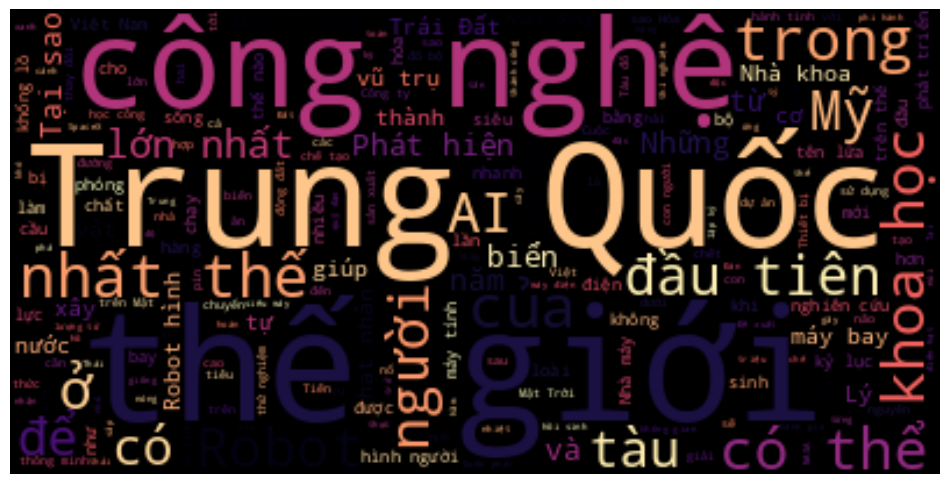

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all titles into a single string
text_KH = ' '.join(data_KH['title'].astype(str).tolist())

# Tạo WordCloud và thay đổi màu sắc
cloud = WordCloud(colormap='magma')
cloud_KH = cloud.generate(text_KH)  # Pass the concatenated string to generate()

# Hiển thị kết quả
plt.imshow(cloud_KH, interpolation='bilinear')
plt.axis('off')
plt.show()



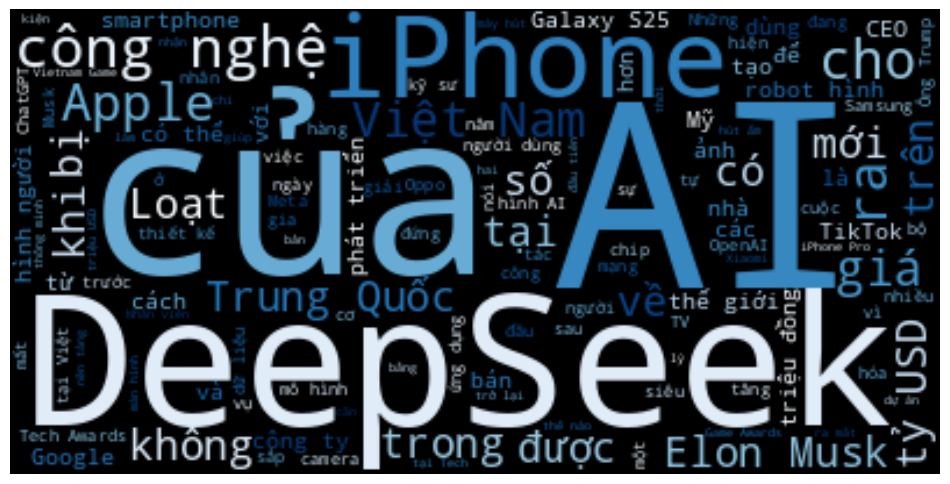

In [ ]:
text_CN = ' '.join(data_CN['title'].astype(str).tolist())
cloud = WordCloud(colormap='Blues')
cloud_CN = cloud.generate(text_CN)  # Pass the concatenated string to generate()
plt.imshow(cloud_CN, interpolation='bilinear')
plt.axis('off')
plt.show()


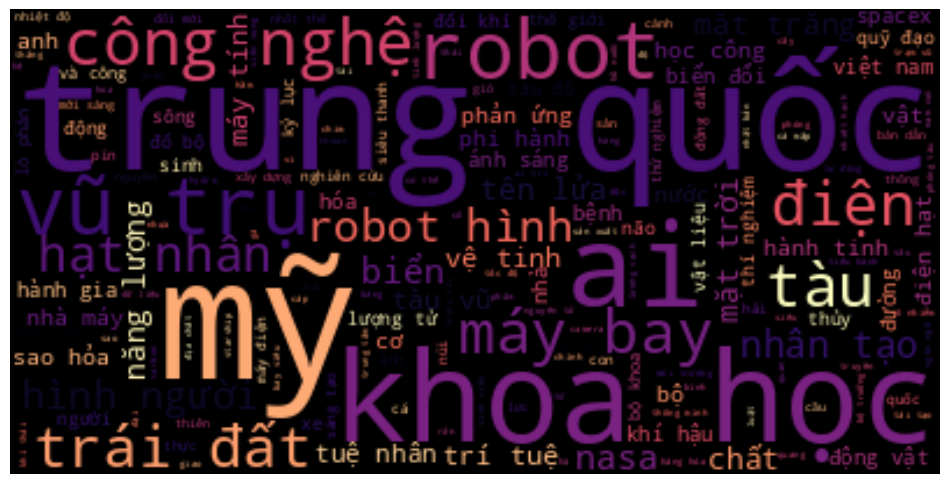

In [ ]:
# Concatenate all titles into a single string
text = ' '.join(data_KH['tags'].astype(str).tolist())

# Tạo WordCloud và thay đổi màu sắc
cloud = WordCloud(colormap='magma')
cloud = cloud.generate(text)  # Pass the concatenated string to generate()

# Hiển thị kết quả
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

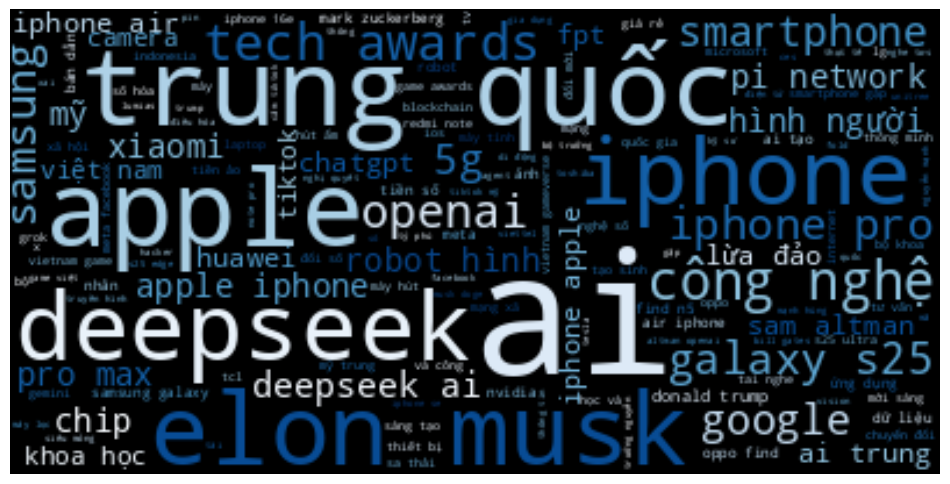

In [ ]:
# Concatenate all titles into a single string
text = ' '.join(data_CN['tags'].astype(str).tolist())

# Tạo WordCloud và thay đổi màu sắc
cloud = WordCloud(colormap='Blues')
cloud = cloud.generate(text)  # Pass the concatenated string to generate()

# Hiển thị kết quả
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

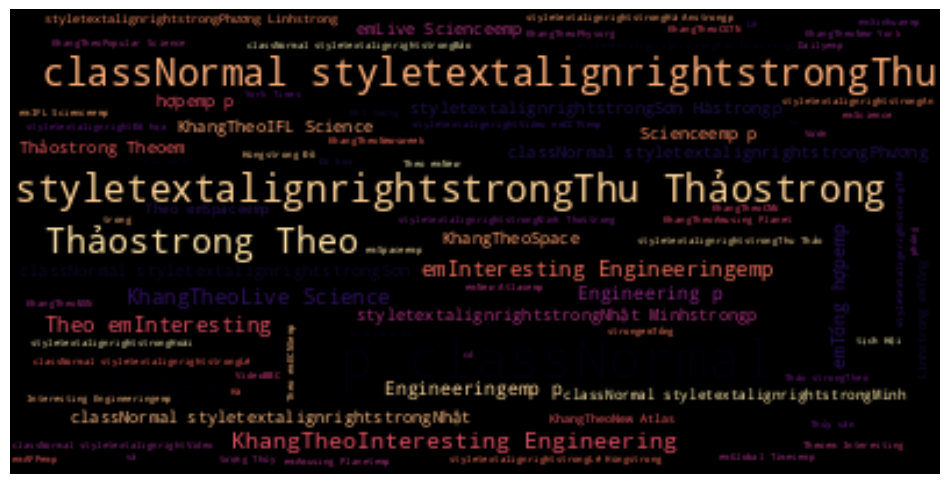

In [ ]:
# Concatenate all titles into a single string
text = ' '.join(data_KH['author'].astype(str).tolist())

# Tạo WordCloud và thay đổi màu sắc
cloud = WordCloud(colormap='magma')
cloud = cloud.generate(text)  # Pass the concatenated string to generate()

# Hiển thị kết quả
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

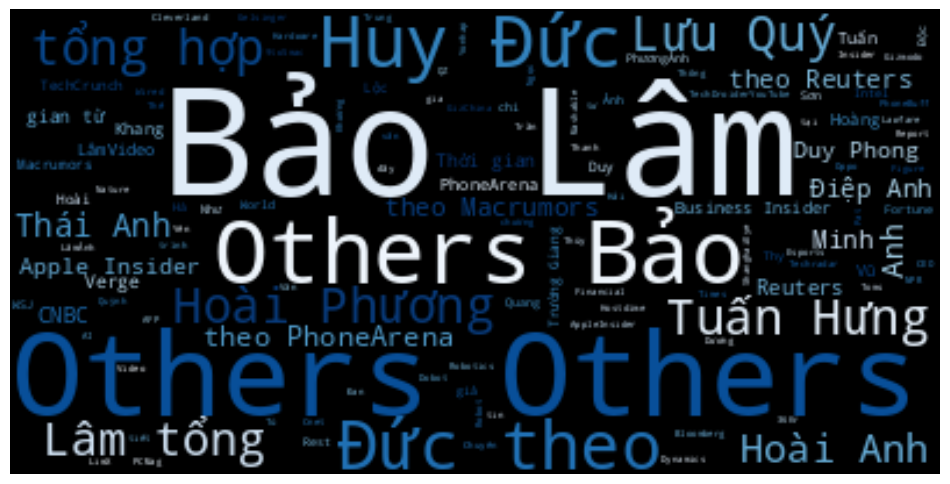

In [ ]:
# Concatenate all titles into a single string
text = ' '.join(data_CN['author'].astype(str).tolist())

# Tạo WordCloud và thay đổi màu sắc
cloud = WordCloud(colormap='Blues')
cloud = cloud.generate(text)  # Pass the concatenated string to generate()

# Hiển thị kết quả
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Số lượng bình luận theo tháng, tuần, ngày và giờ

<ipython-input-105-1a7fe5e29345>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data_KH.groupby(pd.Grouper(key='date', freq=freq))[variables].mean()
<ipython-input-105-1a7fe5e29345>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return data_KH.groupby(pd.Grouper(key='date', freq=freq))[variables].mean()
<ipython-input-105-1a7fe5e29345>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data_KH.groupby(pd.Grouper(key='date', freq=freq))[variables].mean()
<ipython-input-105-1a7fe5e29345>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return data_KH.groupby(pd.Grouper(key='date', freq=freq))[variables].mean()


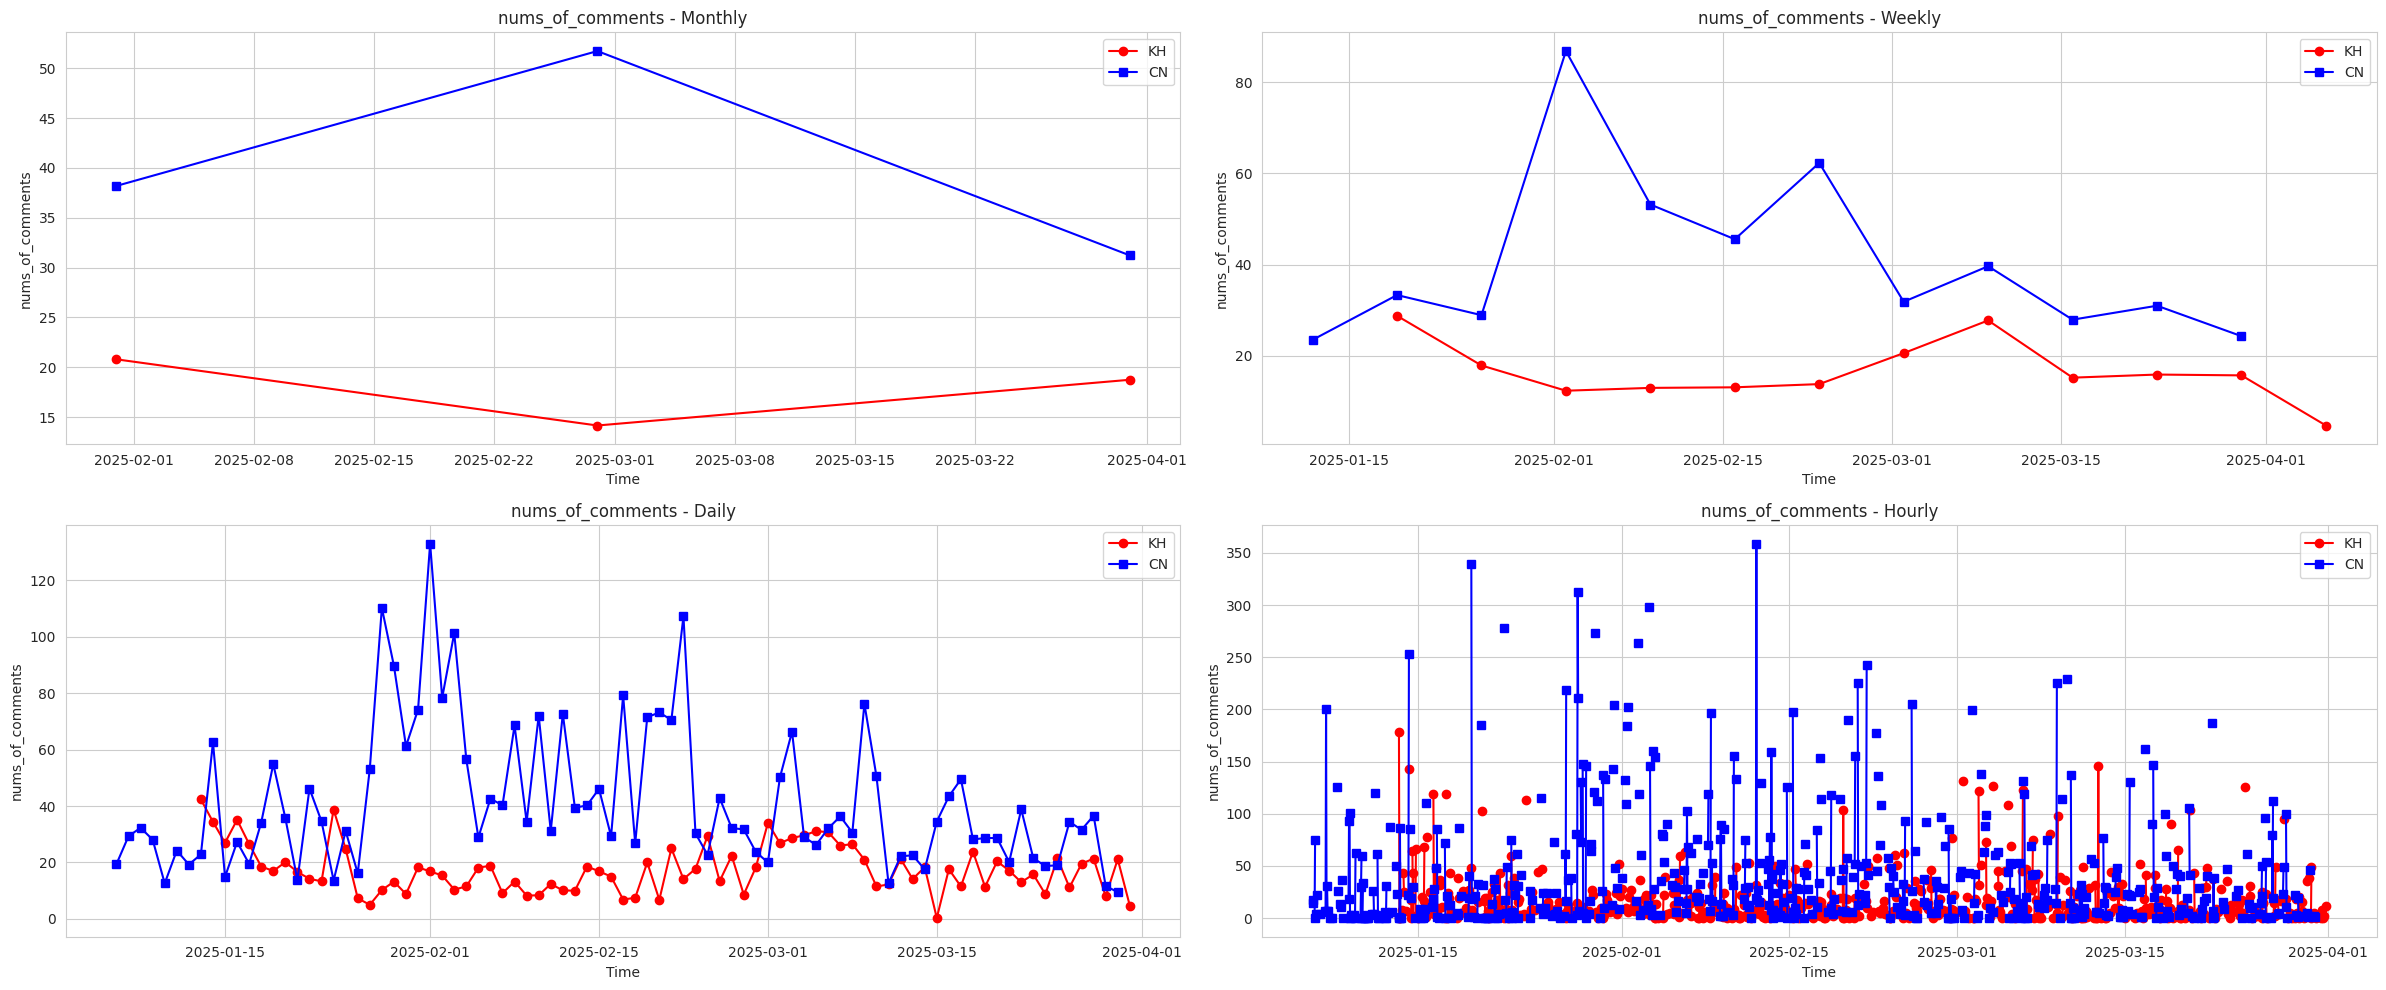

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'nums_of_comments' column is numeric for both datasets
data_KH['nums_of_comments'] = pd.to_numeric(data_KH['nums_of_comments'], errors='coerce').fillna(0)
data_CN['nums_of_comments'] = pd.to_numeric(data_CN['nums_of_comments'], errors='coerce').fillna(0)

# Define variables for analysis
variables = ['nums_of_comments']

# Aggregate data by time intervals
def aggregate_data(data_KH, freq):
    return data_KH.groupby(pd.Grouper(key='date', freq=freq))[variables].mean()

df_KH_monthly = aggregate_data(data_KH, 'M')
df_KH_weekly = aggregate_data(data_KH, 'W')
df_KH_daily = aggregate_data(data_KH, 'D')
df_KH_hourly = aggregate_data(data_KH, 'H')

df_CN_monthly = aggregate_data(data_CN, 'M')
df_CN_weekly = aggregate_data(data_CN, 'W')
df_CN_daily = aggregate_data(data_CN, 'D')
df_CN_hourly = aggregate_data(data_CN, 'H')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(24, 10), sharex=False)

# Define plotting function
def plot_data(ax, df_KH, df_CN, title, var, color_KH='red', color_CN='blue'):
    ax.plot(df_KH.index, df_KH[var], label='KH', linestyle='-', marker='o', color=color_KH)
    ax.plot(df_CN.index, df_CN[var], label='CN', linestyle='-', marker='s', color=color_CN)
    ax.set_title(f"{var} - {title}")
    ax.set_ylabel(var)
    ax.legend()
    ax.grid(True)
    ax.set_xlabel("Time")

# Plot each frequency comparison
plot_data(axes[0, 0], df_KH_monthly, df_CN_monthly, "Monthly", 'nums_of_comments')
plot_data(axes[0, 1], df_KH_weekly, df_CN_weekly, "Weekly", 'nums_of_comments')
plot_data(axes[1, 0], df_KH_daily, df_CN_daily, "Daily", 'nums_of_comments')
plot_data(axes[1, 1], df_KH_hourly, df_CN_hourly, "Hourly", 'nums_of_comments')

plt.tight_layout()
plt.show()

Số lượng: CN có số lượng bình luận vượt trội hoàn toàn so với KH ở mọi cấp độ (tháng, tuần, ngày, giờ).

Biến động: Bình luận của CN cực kỳ biến động mạnh với các đỉnh đột biến rất cao, đặc biệt ở cấp độ ngày và giờ. Ngược lại, KH có số lượng bình luận thấp và ổn định hơn nhiều.

Bản chất hoạt động: Các đỉnh cao của CN cho thấy hoạt động bình luận tập trung vào các khoảng thời gian ngắn (giờ/ngày), gợi ý khả năng liên quan đến các sự kiện, tin tức nóng, hoặc chiến dịch cụ thể. Hoạt động của KH có vẻ đều đặn và tự nhiên hơn.

Xu hướng cuối giai đoạn: Có dấu hiệu giảm nhẹ số lượng bình luận cho cả hai vào cuối giai đoạn phân tích (cuối tháng 3, đầu tháng 4), rõ rệt hơn ở CN sau các đỉnh cao.

<ipython-input-106-0c74b373648e>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  decomp_df['nums_of_comments'] = decomp_df['nums_of_comments'].fillna(method='bfill').fillna(method='ffill')


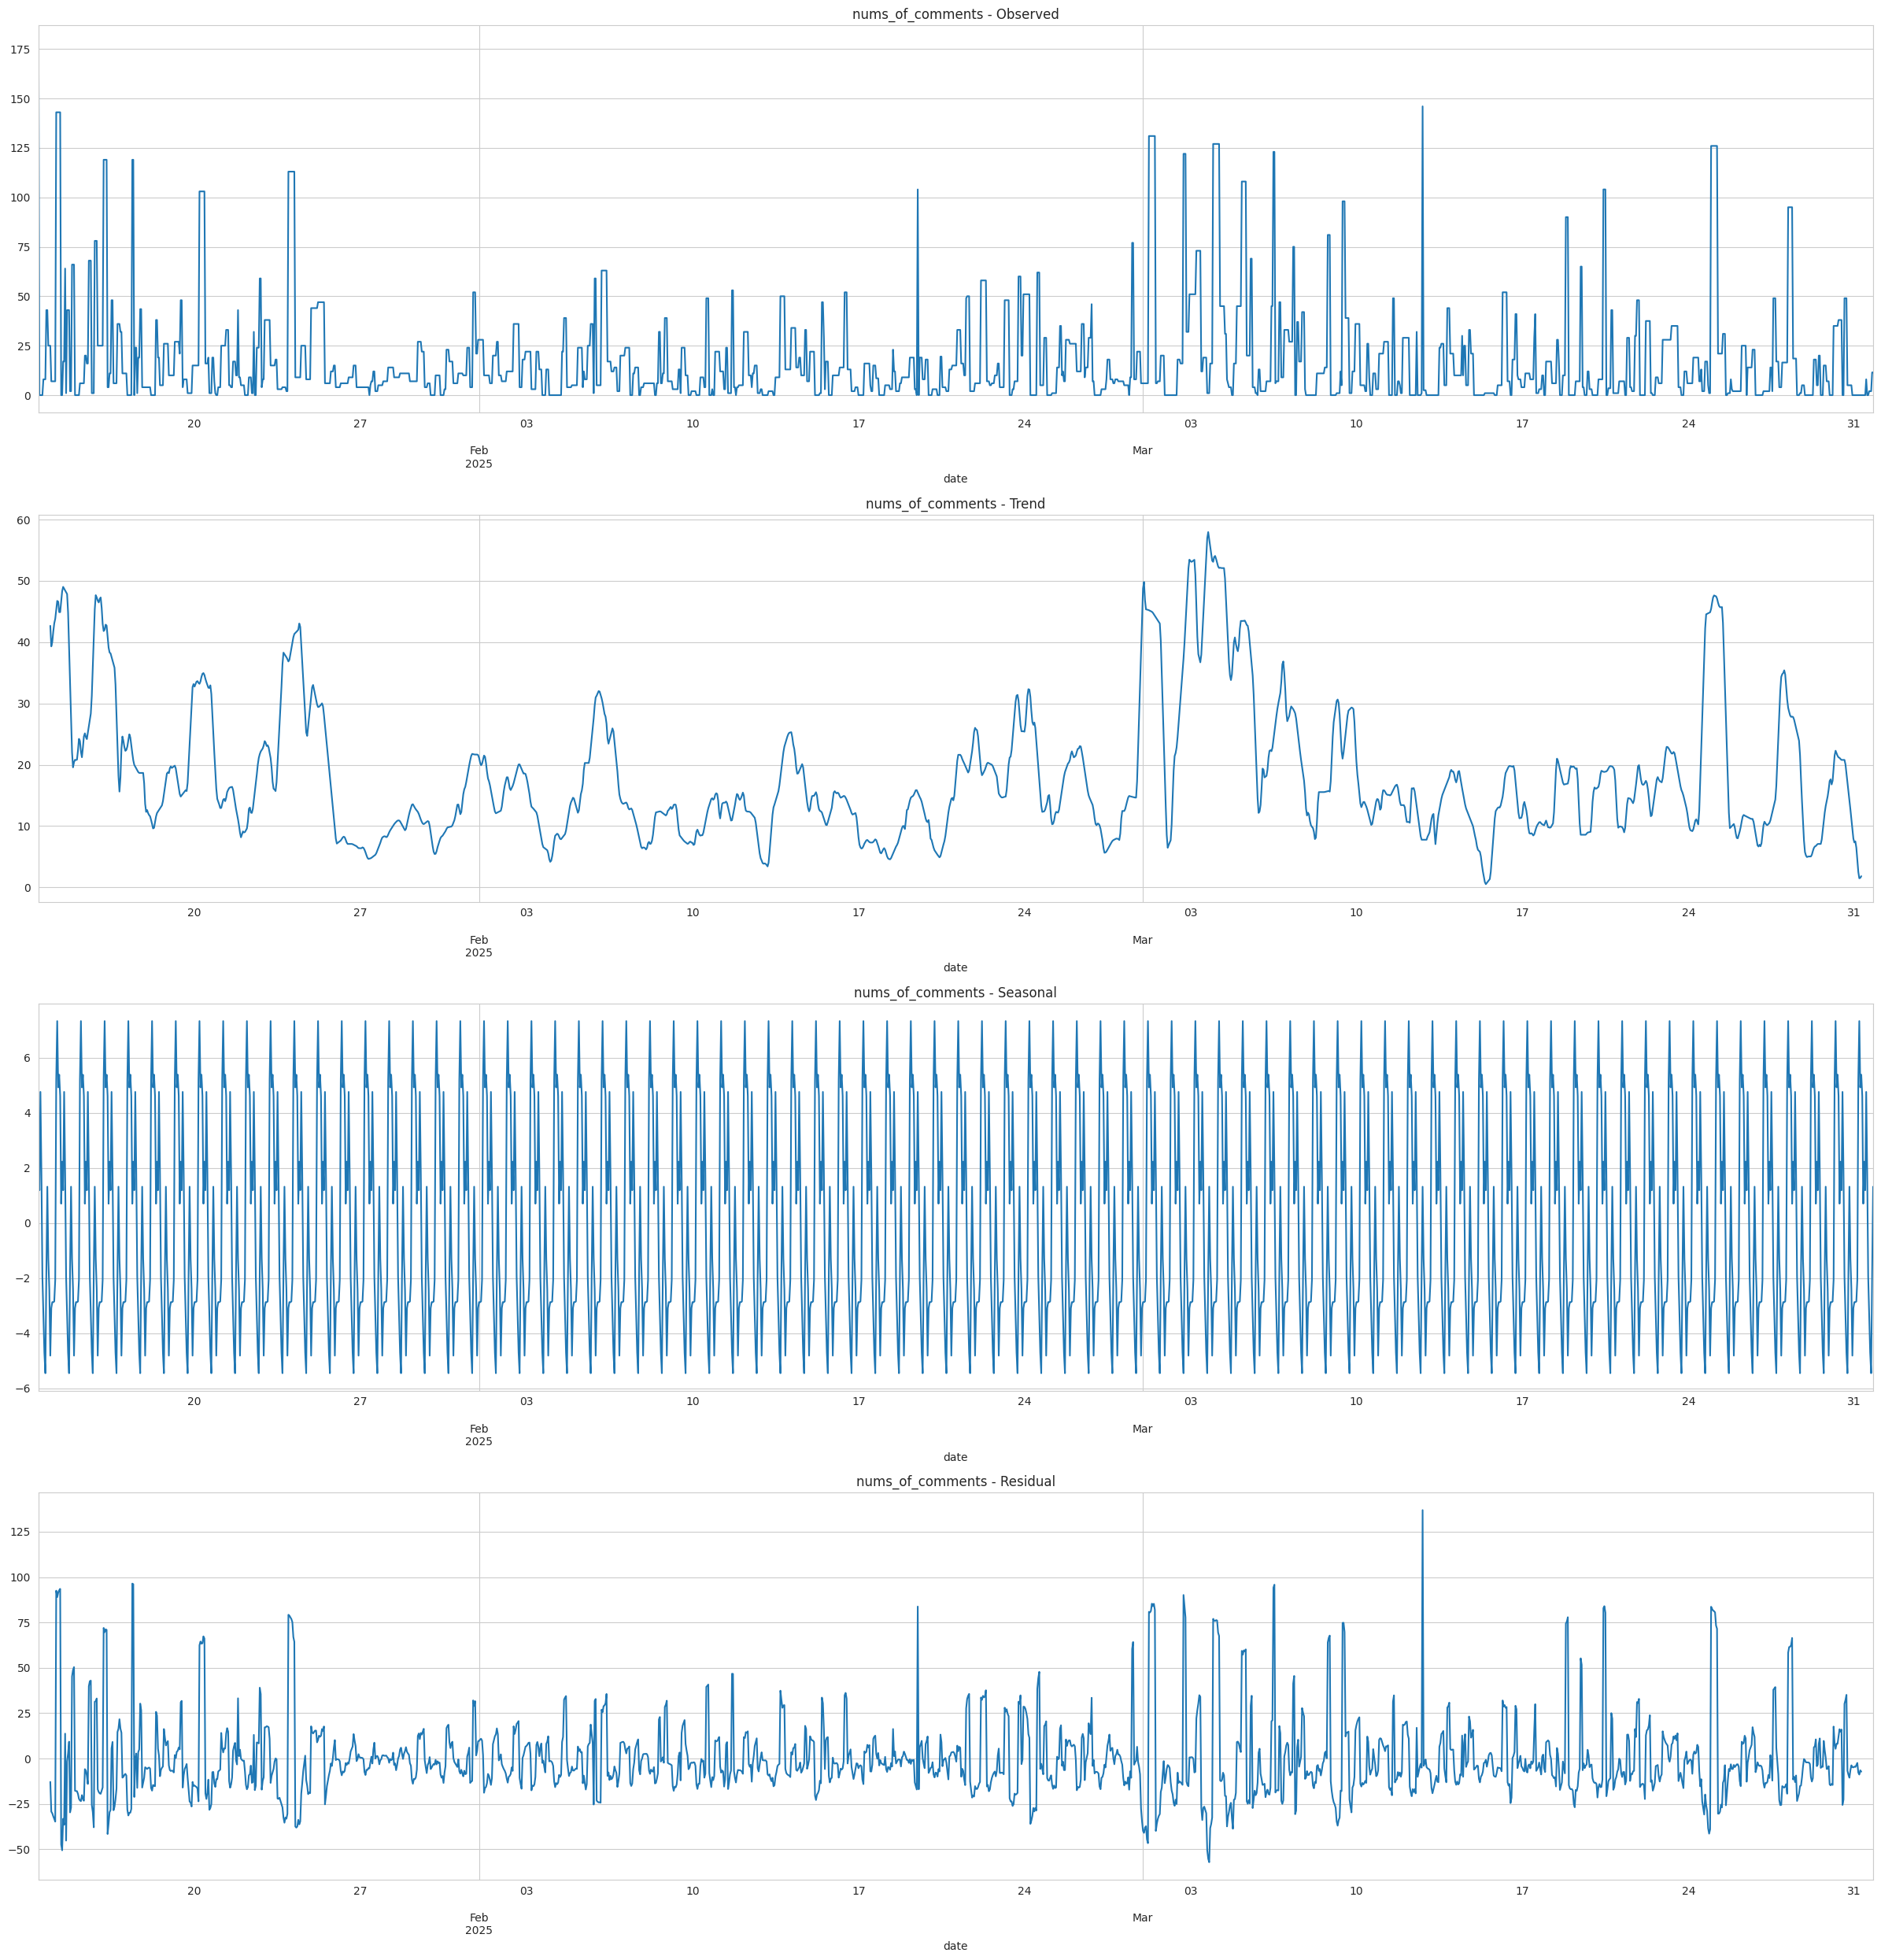

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

fig, axes = plt.subplots(4, 1, figsize=(24, 25))

decomp_df = df_KH_hourly
decomp_df['nums_of_comments'] = decomp_df['nums_of_comments'].replace([np.inf, -np.inf], np.nan)
decomp_df['nums_of_comments'] = decomp_df['nums_of_comments'].interpolate(method='nearest')
decomp_df['nums_of_comments'] = decomp_df['nums_of_comments'].fillna(method='bfill').fillna(method='ffill')

# Calculate the appropriate period based on your data frequency and suspected seasonality
# For hourly data, if you suspect daily seasonality, use period=24
# If you suspect weekly seasonality, use period=24*7 = 168
period = 24  # Assuming daily seasonality in hourly data

# Perform seasonal decomposition with the calculated period
decomposition = seasonal_decompose(decomp_df['nums_of_comments'], model='additive', period=period)

# Correct way to access the Axes objects:
decomposition.observed.plot(ax=axes[0], title=f"{'nums_of_comments'} - Observed", legend=False)
decomposition.trend.plot(ax=axes[1], title=f"{'nums_of_comments'} - Trend", legend=False)
decomposition.seasonal.plot(ax=axes[2], title=f"{'nums_of_comments'} - Seasonal", legend=False)
decomposition.resid.plot(ax=axes[3], title=f"{'nums_of_comments'} - Residual", legend=False)

plt.tight_layout()
plt.show()

Cấu trúc dữ liệu: Dữ liệu số lượng bình luận được cấu thành từ một xu hướng biến động dài hạn (theo tuần/tháng), một chu kỳ mùa vụ hàng ngày rất mạnh mẽ và đều đặn, cùng với các yếu tố nhiễu ngẫu nhiên và các sự kiện đột biến.

Tầm quan trọng của mùa vụ: Yếu tố mùa vụ hàng ngày đóng góp rất lớn vào sự biến động chung quan sát được trong dữ liệu gốc.

Xác định bất thường: Phần dư (Residual) giúp xác định các thời điểm có hoạt động bình luận bất thường, không đi theo xu hướng hay quy luật hàng ngày. Các đỉnh cao trong biểu đồ Residual là những điểm đáng chú ý, cần phân tích sâu hơn về nguyên nhân (ví dụ: sự kiện gì đã xảy ra vào thời điểm đó?).

<ipython-input-107-f139235aae1f>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  decomp_df['nums_of_comments'] = decomp_df['nums_of_comments'].fillna(method='bfill').fillna(method='ffill')


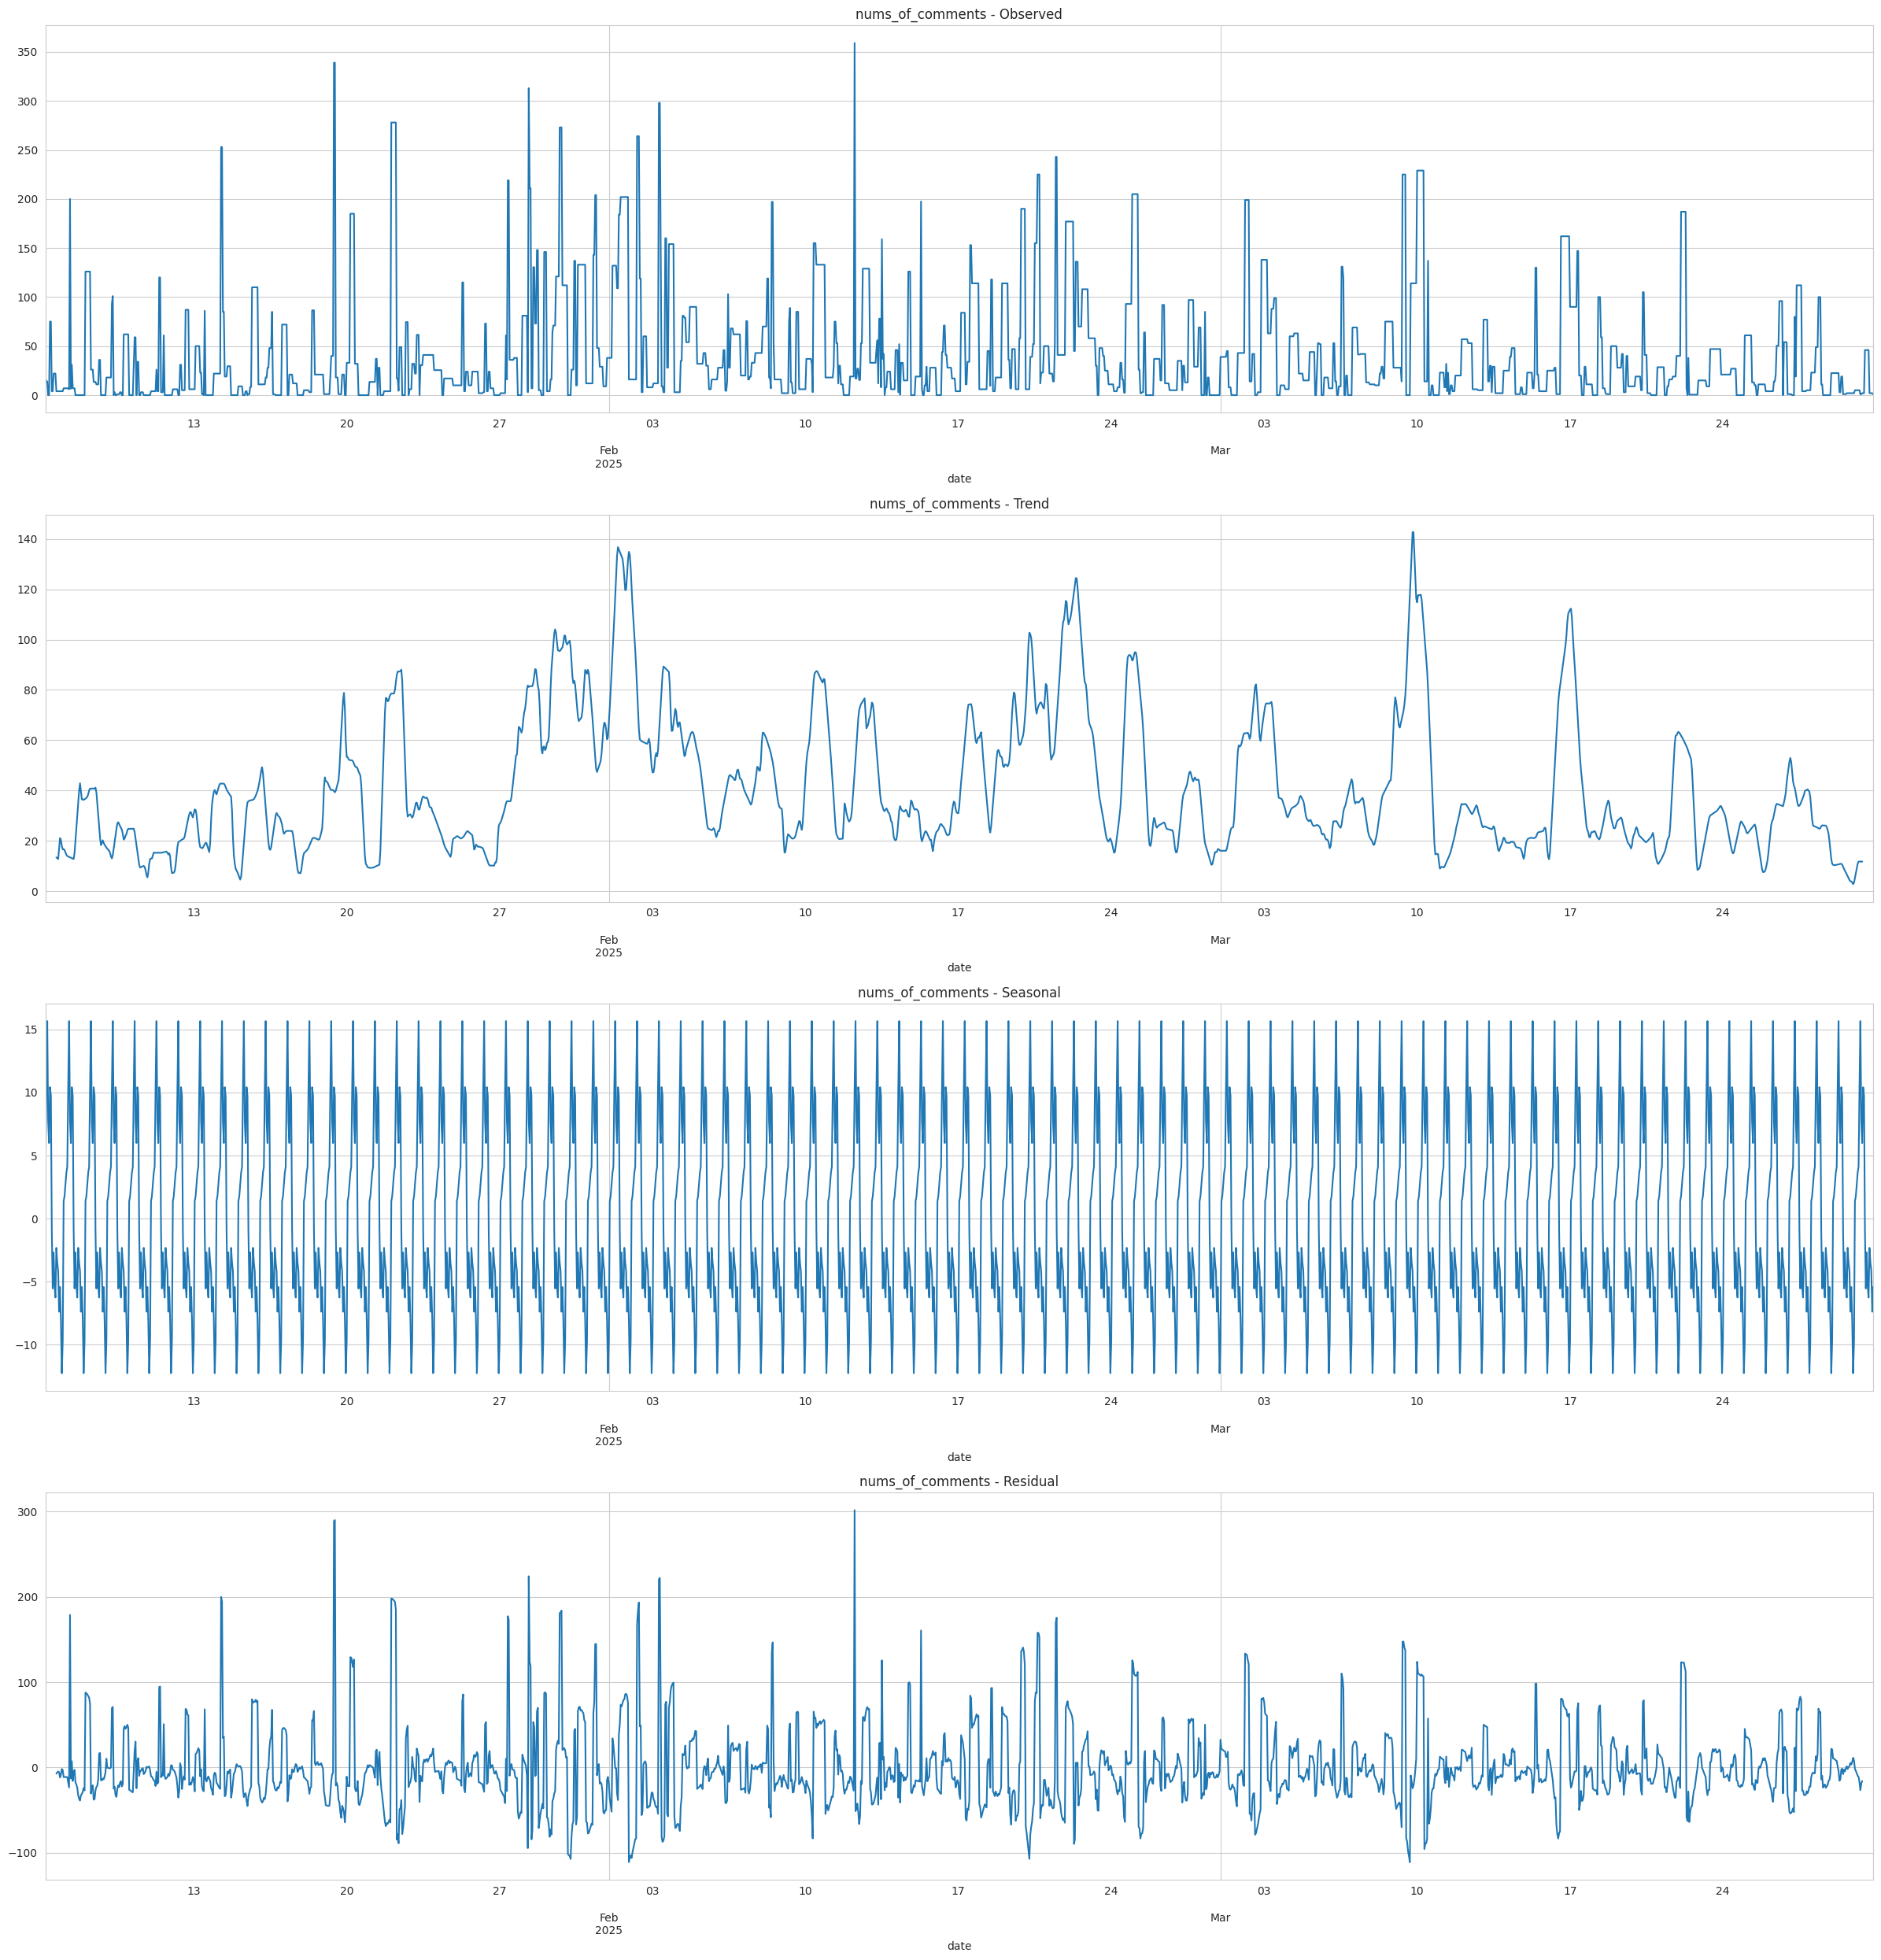

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

fig, axes = plt.subplots(4, 1, figsize=(24, 25))

decomp_df = df_CN_hourly
decomp_df['nums_of_comments'] = decomp_df['nums_of_comments'].replace([np.inf, -np.inf], np.nan)
decomp_df['nums_of_comments'] = decomp_df['nums_of_comments'].interpolate(method='nearest')
decomp_df['nums_of_comments'] = decomp_df['nums_of_comments'].fillna(method='bfill').fillna(method='ffill')

# Calculate the appropriate period based on your data frequency and suspected seasonality
# For hourly data, if you suspect daily seasonality, use period=24
# If you suspect weekly seasonality, use period=24*7 = 168
period = 24  # Assuming daily seasonality in hourly data

# Perform seasonal decomposition with the calculated period
decomposition = seasonal_decompose(decomp_df['nums_of_comments'], model='additive', period=period)

# Correct way to access the Axes objects:
decomposition.observed.plot(ax=axes[0], title=f"{'nums_of_comments'} - Observed", legend=False)
decomposition.trend.plot(ax=axes[1], title=f"{'nums_of_comments'} - Trend", legend=False)
decomposition.seasonal.plot(ax=axes[2], title=f"{'nums_of_comments'} - Seasonal", legend=False)
decomposition.resid.plot(ax=axes[3], title=f"{'nums_of_comments'} - Residual", legend=False)

plt.tight_layout()
plt.show()

Biến động đa yếu tố: Số lượng bình luận bị chi phối bởi cả ba yếu tố: xu hướng dài hạn thay đổi mạnh mẽ, chu kỳ mùa vụ hàng ngày rất rõ nét, và các cú sốc/nhiễu ngẫu nhiên có biên độ cực lớn.

Tầm quan trọng của sự kiện bất thường: Phần dư (Residual) có biên độ rất lớn cho thấy các sự kiện đột biến, không nằm trong xu hướng hay quy luật mùa vụ, đóng vai trò cực kỳ quan trọng trong việc tạo ra các đỉnh cao nhất trong dữ liệu gốc. Việc phân tích các thời điểm có phần dư lớn là rất cần thiết để hiểu nguyên nhân gốc rễ.

Kết hợp Trend và Residual: Các giai đoạn có xu hướng (Trend) cao (như quanh 20/02 và 10/03) cũng thường là lúc xuất hiện các đỉnh Residual lớn nhất, cho thấy các sự kiện bất thường có xu hướng xảy ra hoặc có tác động mạnh hơn trong những thời kỳ hoạt động chung đang sôi nổi.

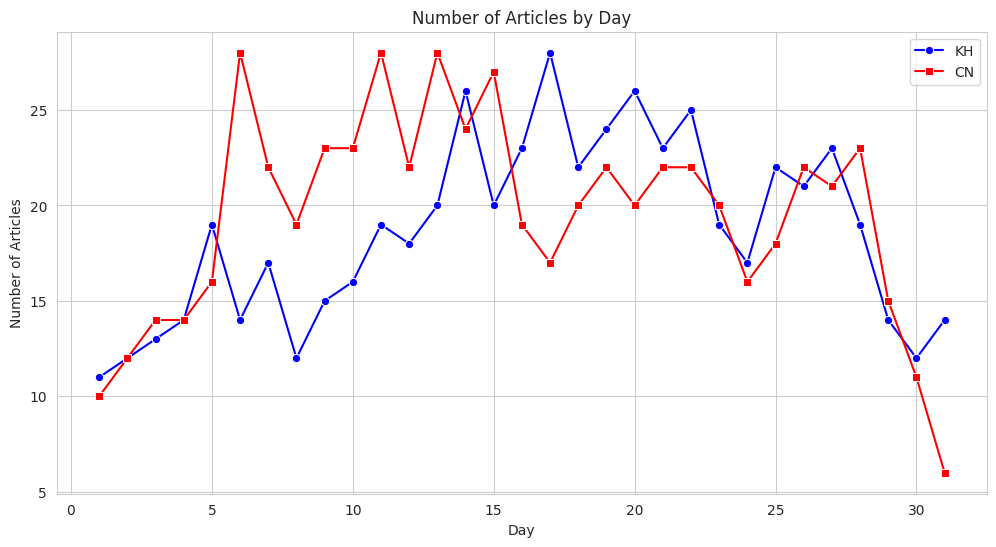

In [ ]:
# Calculate the count of articles by day of the month for data_KH
count_by_day_KH = data_KH.groupby('day')['category'].count().reset_index()
count_by_day_KH.columns = ['day', 'count_category']

# Calculate the count of articles by day of the month for data_CN
count_by_day_CN = data_CN.groupby('day')['category'].count().reset_index()
count_by_day_CN.columns = ['day', 'count_category']

# Plotting the lineplot for comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=count_by_day_KH, x='day', y='count_category', marker='o', color='b', label='KH')
sns.lineplot(data=count_by_day_CN, x='day', y='count_category', marker='s', color='r', label='CN')

plt.title("Number of Articles by Day")
plt.xlabel("Day")
plt.ylabel("Number of Articles")
plt.legend()
plt.grid(True)
plt.show()

Cả dữ liệu về Khoa Học(KH) và Công nghệ (CN) đều xuất bản lượng bài viết biến động mạnh hàng ngày.

CN có các đỉnh cao sớm và nhọn hơn, biến động mạnh hơn.

KH tăng chậm hơn nhưng duy trì mức cao ổn định hơn ở giữa và cuối tháng.

Không nguồn nào vượt trội hoàn toàn; vị trí dẫn đầu thay đổi liên tục.

Cả hai đều giảm mạnh vào cuối tháng, đặc biệt là CN.

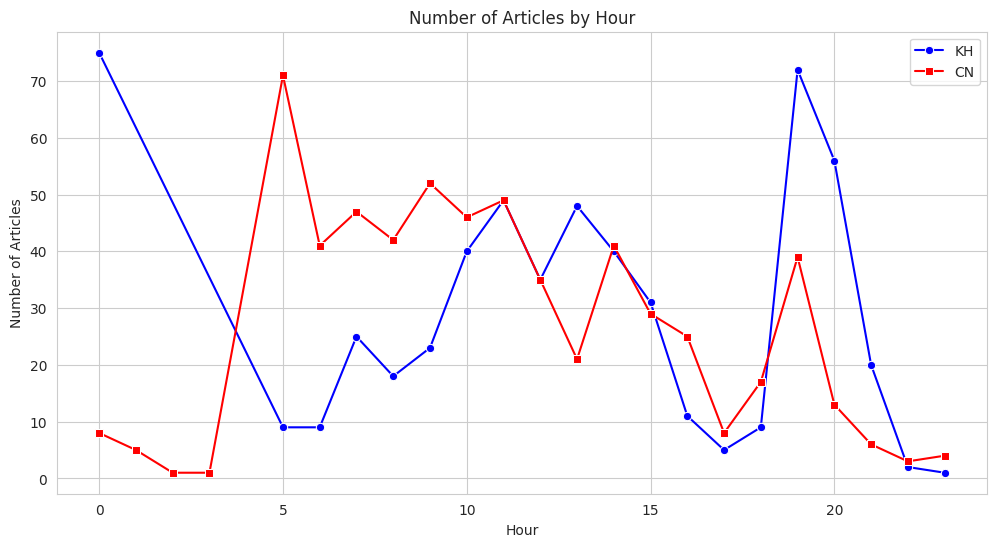

In [ ]:
# Calculate the count of articles by day of the month for data_KH
count_by_day_KH = data_KH.groupby('hour')['category'].count().reset_index()
count_by_day_KH.columns = ['hour', 'count_category']

# Calculate the count of articles by day of the month for data_CN
count_by_day_CN = data_CN.groupby('hour')['category'].count().reset_index()
count_by_day_CN.columns = ['hour', 'count_category']

# Plotting the lineplot for comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=count_by_day_KH, x='hour', y='count_category', marker='o', color='b', label='KH')
sns.lineplot(data=count_by_day_CN, x='hour', y='count_category', marker='s', color='r', label='CN')

plt.title("Number of Articles by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.legend()
plt.grid(True)
plt.show()

KH: Xuất bản cực kỳ tập trung vào 0h (nửa đêm) và 19h (tối), hoạt động rất thấp ở các giờ khác.

CN: Có đỉnh cao nhất vào 5h sáng, duy trì hoạt động tương đối cao và dàn trải hơn trong suốt giờ hành chính ban ngày.

Có thể nhận thấy 2 nguồn có chiến lược thời gian xuất bản rất khác nhau, chỉ có sự gia tăng hoạt động chung vào 19h (nhưng KH vượt trội).

CN hoạt động mạnh hơn KH vào hầu hết các giờ ban ngày.

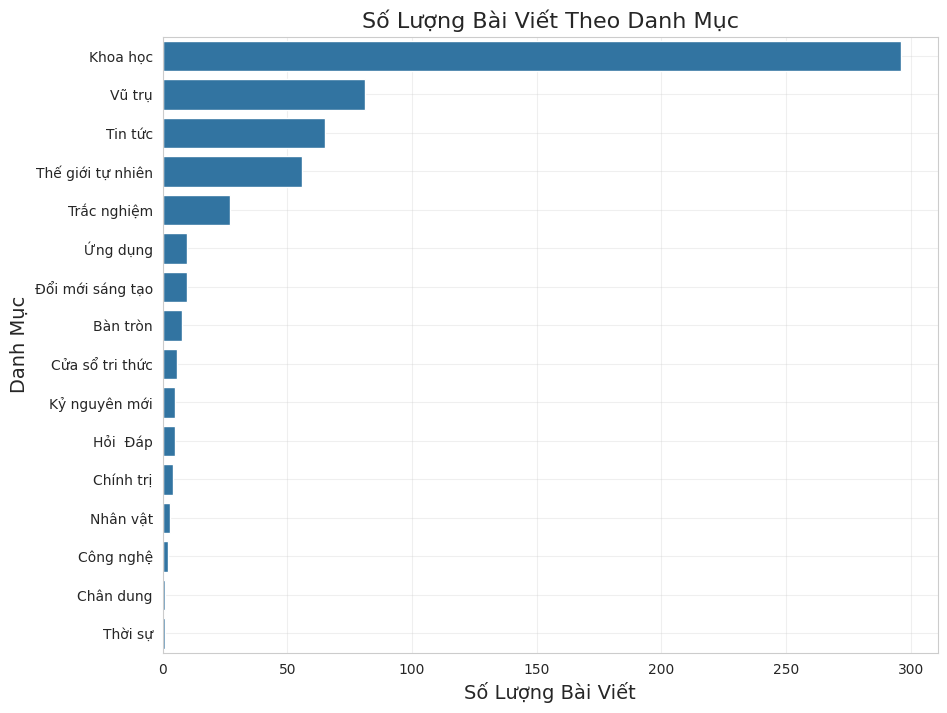

Tổng số danh mục: 16

Phân bố theo danh mục:


Số lượng  Phần trăm (%)
category                                  
Khoa học                296          51.03
Vũ trụ                   81          13.97
Tin tức                  65          11.21
Thế giới tự nhiên        56           9.66
Trắc nghiệm              27           4.66
Ứng dụng                 10           1.72
Đổi mới sáng tạo         10           1.72
Bàn tròn                  8           1.38
Cửa sổ tri thức           6           1.03
Kỷ nguyên mới             5           0.86
Hỏi  Đáp                  5           0.86
Chính trị                 4           0.69
Nhân vật                  3           0.52
Công nghệ                 2           0.34
Chân dung                 1           0.17
Thời sự                   1           0.17

In [ ]:
plt.figure(figsize=(10, 8))
category_counts = data_KH['category'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.title('Số Lượng Bài Viết Theo Danh Mục', fontsize=16)
plt.xlabel('Số Lượng Bài Viết', fontsize=14)
plt.ylabel('Danh Mục', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Tổng số danh mục: {data_KH['category'].nunique()}")
print("\nPhân bố theo danh mục:")
category_percentage = (data_KH['category'].value_counts() / len(data_KH) * 100).round(2)
pd.DataFrame({'Số lượng': data_KH['category'].value_counts(),
              'Phần trăm (%)': category_percentage})

Danh mục Khoa học thống trị tuyệt đối về số lượng bài viết.

Vũ trụ, Tin tức, Thế giới tự nhiên là các danh mục phổ biến thứ hai.

Phần lớn các danh mục còn lại có số lượng bài viết rất thấp

Nội dung tập trung mạnh vào Khoa học và các lĩnh vực liên quan, trong khi các chủ đề như Công nghệ, Chính trị, Thời sự... được đề cập rất ít.
Phản ánh rõ chiến lược nội dung hoặc kết quả tự nhiên của việc sản xuất nội dung, ưu tiên mạnh mẽ cho một số ít chủ đề cốt lõi.

Phân tích danh mục

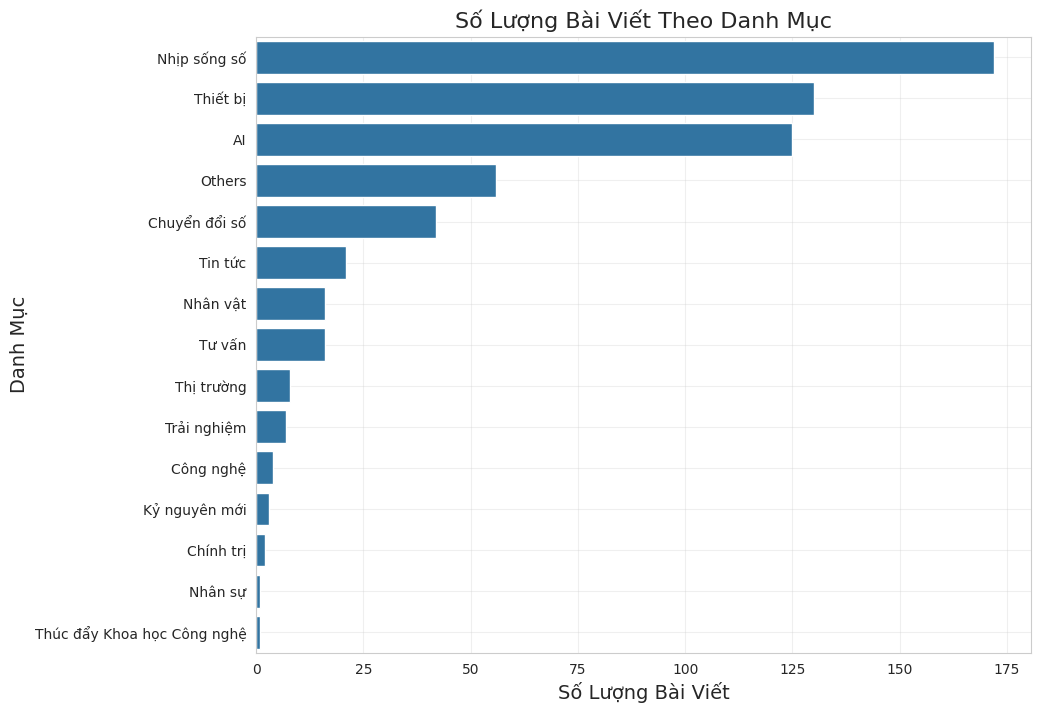

Tổng số danh mục: 15

Phân bố theo danh mục:


Số lượng  Phần trăm (%)
category                                            
Nhịp sống số                      172          28.48
Thiết bị                          130          21.52
AI                                125          20.70
Others                             56           9.27
Chuyển đổi số                      42           6.95
Tin tức                            21           3.48
Nhân vật                           16           2.65
Tư vấn                             16           2.65
Thị trường                          8           1.32
Trải nghiệm                         7           1.16
Công nghệ                           4           0.66
Kỷ nguyên mới                       3           0.50
Chính trị                           2           0.33
Nhân sự                             1           0.17
Thúc đẩy Khoa học Công nghệ         1           0.17

In [ ]:
plt.figure(figsize=(10, 8))
category_counts = data_CN['category'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.title('Số Lượng Bài Viết Theo Danh Mục', fontsize=16)
plt.xlabel('Số Lượng Bài Viết', fontsize=14)
plt.ylabel('Danh Mục', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Tổng số danh mục: {data_CN['category'].nunique()}")
print("\nPhân bố theo danh mục:")
category_percentage = (data_CN['category'].value_counts() / len(data_CN) * 100).round(2)
pd.DataFrame({'Số lượng': data_CN['category'].value_counts(),
              'Phần trăm (%)': category_percentage})

Có thể nhận thấy dữ liệu đồng đều hơn so với dữ liệu Khoa Học

Chủ đề "Nhịp sống số" có số lượng bài viết cao nhất (172 bài) chiếm hơn 28%

Ở mức số lượng trung bình có các chủ đề "Thiết bị", "AI", "Tin tức"

Thấp nhất là chủ đề "Nhân sự" và "Thúc đẩy Khoa học Công nghệ"

Nhìn chung, số lượng bài viết giữa các chủ đề thuộc nhóm "Công nghệ" có phân bố khá đồng đều, số lượng ổn định. Phản ánh sự tập trung đều cho các danh mục

Phân tích độ dài nội dung

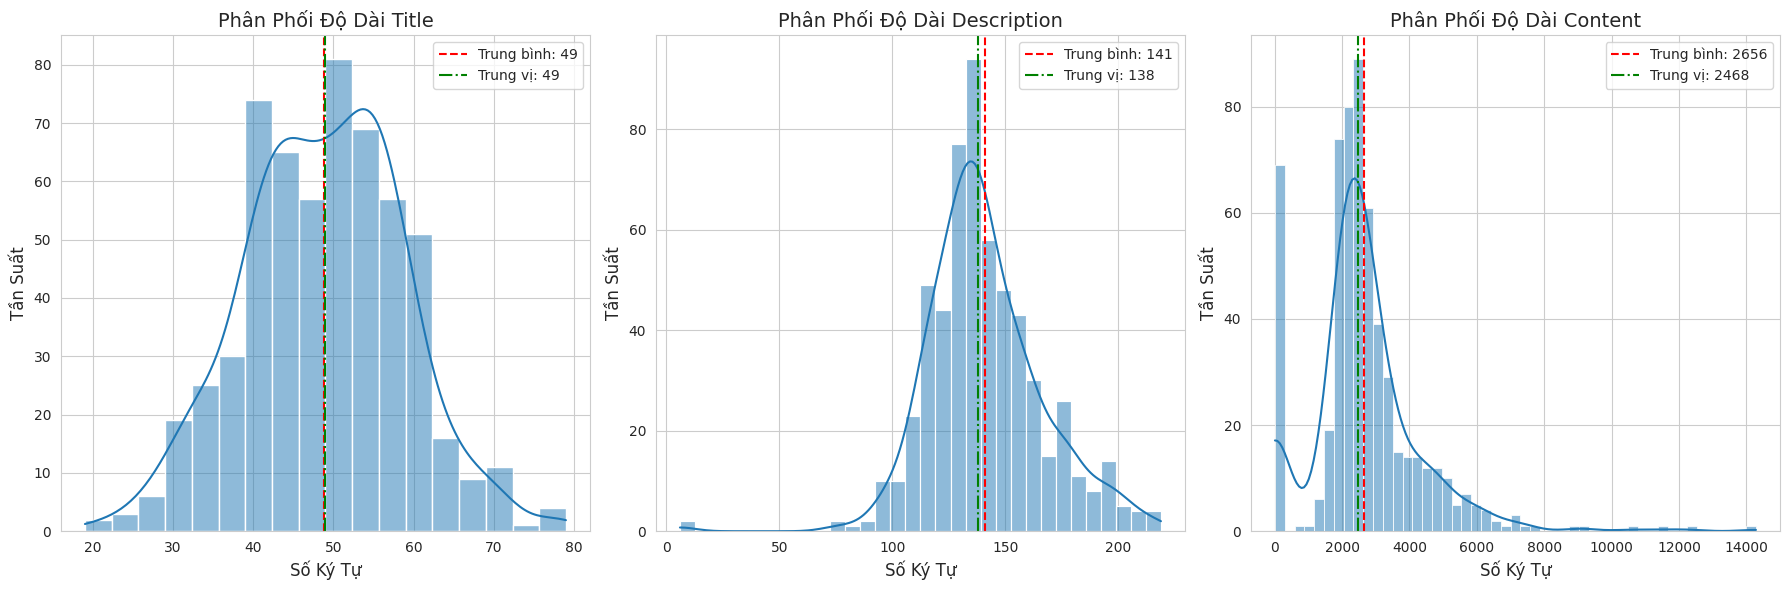

Trung bình  Trung vị  Độ lệch chuẩn  Min    Max
Tiêu đề        48.76      49.0           9.95   19     79
Mô tả         140.95     138.0          25.55    6    219
Nội dung     2656.42    2468.0        1685.98    8  14287

In [ ]:
# Tính độ dài của title, description và content
df = data_KH
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['content_length'] = df['content'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Tạo biểu đồ phân phối
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(['title_length', 'description_length', 'content_length']):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân Phối Độ Dài {column.split("_")[0].capitalize()}', fontsize=14)
    axes[i].set_xlabel('Số Ký Tự', fontsize=12)
    axes[i].set_ylabel('Tần Suất', fontsize=12)

    # Thêm trung bình và trung vị
    axes[i].axvline(df[column].mean(), color='r', linestyle='--', label=f'Trung bình: {df[column].mean():.0f}')
    axes[i].axvline(df[column].median(), color='g', linestyle='-.', label=f'Trung vị: {df[column].median():.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Thống kê cơ bản về độ dài
pd.DataFrame({
    'Trung bình': [df['title_length'].mean(), df['description_length'].mean(), df['content_length'].mean()],
    'Trung vị': [df['title_length'].median(), df['description_length'].median(), df['content_length'].median()],
    'Độ lệch chuẩn': [df['title_length'].std(), df['description_length'].std(), df['content_length'].std()],
    'Min': [df['title_length'].min(), df['description_length'].min(), df['content_length'].min()],
    'Max': [df['title_length'].max(), df['description_length'].max(), df['content_length'].max()]
}, index=['Tiêu đề', 'Mô tả', 'Nội dung']).round(2)

Title & Description: Độ dài nhất quán, phân phối đối xứng quanh giá trị trung tâm (Title ~49, Description ~140 ký tự).

Content: Độ dài rất biến động, phân phối lệch mạnh sang phải, đa số bài có độ dài vừa phải (Trung vị ~2468) nhưng có nhiều bài rất dài kéo Trung bình lên cao (2656).

Có sự khác biệt lớn về quy mô và tính ổn định độ dài giữa các thành phần.

Bản chất: Sự khác biệt này phản ánh đúng bản chất: Title và Description cần ngắn gọn, súc tích để thu hút và tóm tắt. Content thì linh hoạt hơn nhiều, độ dài phụ thuộc vào chủ đề, độ sâu phân tích, loại hình bài viết (tin ngắn, bài phân tích, phỏng vấn...).

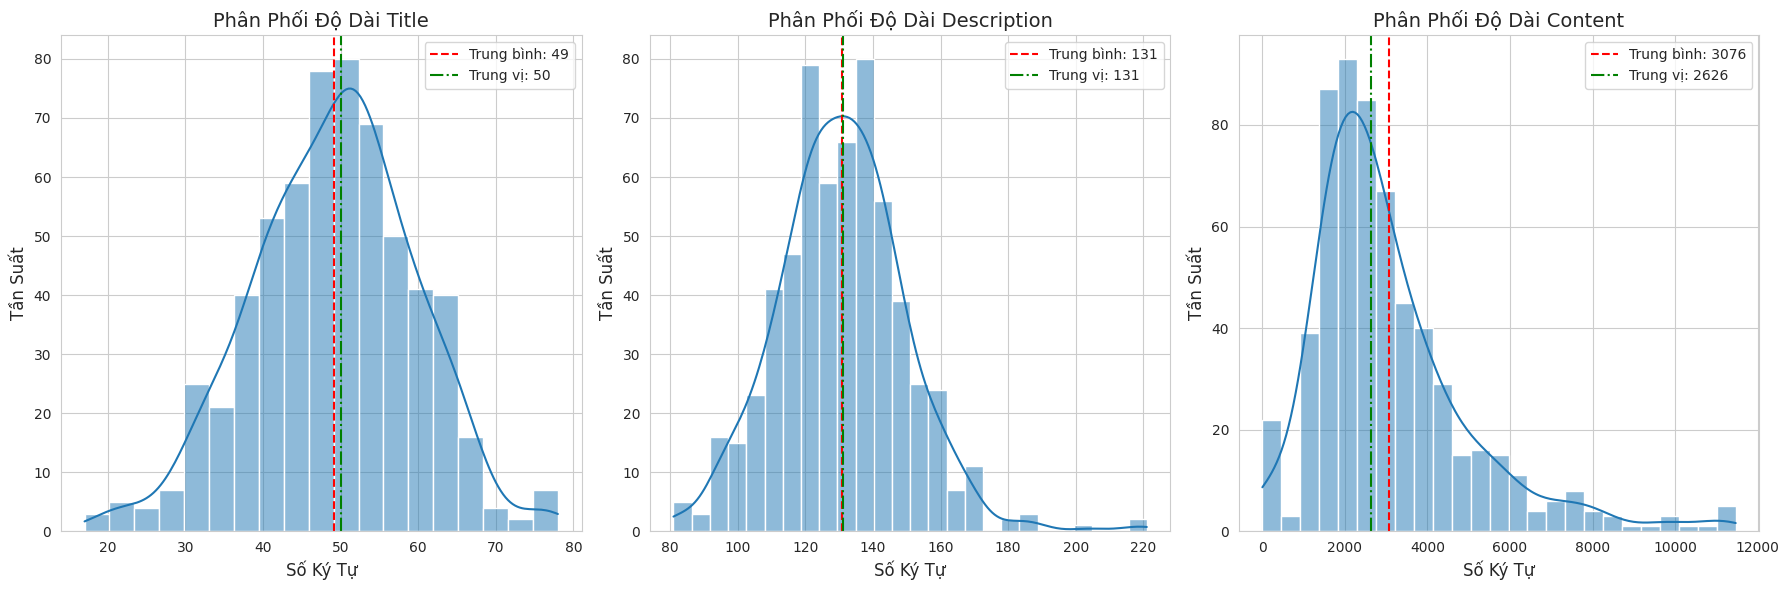

Trung bình  Trung vị  Độ lệch chuẩn  Min    Max
Tiêu đề        49.09      50.0          10.43   17     78
Mô tả         130.77     131.0          18.81   81    221
Nội dung     3075.83    2626.0        1909.21    6  11467

In [ ]:
# Tính độ dài của title, description và content
df = data_CN
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['content_length'] = df['content'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Tạo biểu đồ phân phối
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(['title_length', 'description_length', 'content_length']):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân Phối Độ Dài {column.split("_")[0].capitalize()}', fontsize=14)
    axes[i].set_xlabel('Số Ký Tự', fontsize=12)
    axes[i].set_ylabel('Tần Suất', fontsize=12)

    # Thêm trung bình và trung vị
    axes[i].axvline(df[column].mean(), color='r', linestyle='--', label=f'Trung bình: {df[column].mean():.0f}')
    axes[i].axvline(df[column].median(), color='g', linestyle='-.', label=f'Trung vị: {df[column].median():.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Thống kê cơ bản về độ dài
pd.DataFrame({
    'Trung bình': [df['title_length'].mean(), df['description_length'].mean(), df['content_length'].mean()],
    'Trung vị': [df['title_length'].median(), df['description_length'].median(), df['content_length'].median()],
    'Độ lệch chuẩn': [df['title_length'].std(), df['description_length'].std(), df['content_length'].std()],
    'Min': [df['title_length'].min(), df['description_length'].min(), df['content_length'].min()],
    'Max': [df['title_length'].max(), df['description_length'].max(), df['content_length'].max()]
}, index=['Tiêu đề', 'Mô tả', 'Nội dung']).round(2)

Độ nhất quán tương phản: Giống như xu hướng chung, CN thể hiện sự nhất quán cao trong độ dài Title và Description, nhưng độ dài Content lại biến động mạnh.

Dữ liệu CN tuân thủ rất chặt chẽ các tiêu chuẩn độ dài cho Title (49-50) và Description (~131).

CN có xu hướng sản xuất nội dung (Content) dài hơn so với mức trung bình chung đã thấy ở bộ dữ liệu KH. Cả trung bình và trung vị độ dài Content của CN đều cao hơn.

Trung bình vs. Trung vị: Sự chênh lệch lớn giữa trung bình và trung vị ở Content của CN nhấn mạnh rằng độ dài trung bình không phải là chỉ số tốt nhất để đại diện cho độ dài "phổ biến" của nội dung; trung vị (2626) phản ánh tốt hơn độ dài của một bài viết điển hình.

# Vẽ biểu đồ đa biến

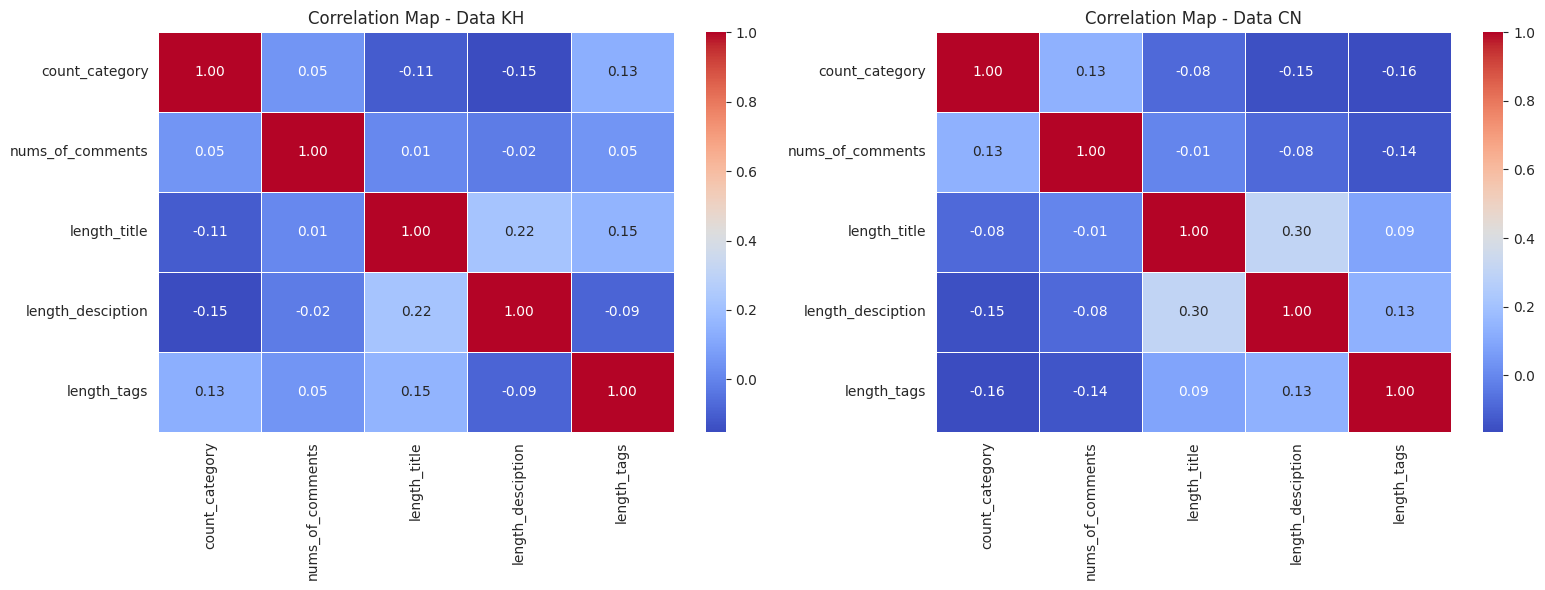

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the count of articles per category for data_KH
count_category_KH = data_KH['category'].value_counts().reset_index()
# count_category_KH.columns = ['category', 'count_category_merge'] # Rename the column to avoid conflict

data_KH = data_KH.merge(count_category_KH, on='category', how='left')

# Calculate the count of articles per category for data_CN
count_category_CN = data_CN['category'].value_counts().reset_index()
# count_category_CN.columns = ['category', 'count_category_merge'] # Rename the column to avoid conflict

data_CN = data_CN.merge(count_category_CN, on='category', how='left')

# Columns for correlation analysis
corr_cols = ['count_category', 'nums_of_comments', 'length_title', 'length_desciption', 'length_tags']  # Use the new column name


# Ensure 'count_category_merge' column exists before calculating correlation for data_KH
if 'count_category' in data_KH.columns: # Check for new column name
    corr_matrix_KH = data_KH[corr_cols].corr()
else:
    print("Error: 'count_category_merge' column not found in data_KH DataFrame.")

# Ensure 'count_category_merge' column exists before calculating correlation for data_CN
if 'count_category' in data_CN.columns: # Check for new column name
    corr_matrix_CN = data_CN[corr_cols].corr()
else:
    print("Error: 'count_category_merge' column not found in data_CN DataFrame.")

# Plotting the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix_KH, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Map - Data KH")

sns.heatmap(corr_matrix_CN, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Map - Data CN")

plt.tight_layout()
plt.show()


# Làm sạch dữ liệu

## Làm sạch dữ liệu data_KH

In [ ]:
df_clean = data_KH.copy()

Làm sạch dữ liệu văn bản

In [ ]:
import re
def clean_text(text):
    if pd.isna(text):
        return ""

    # Loại bỏ HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Loại bỏ URL
    text = re.sub(r'http\S+', ' ', text)
    # Loại bỏ ký tự đặc biệt và số
    text = re.sub(r'[^\w\s]', ' ', text)
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Áp dụng hàm làm sạch cho các cột văn bản
df_clean['content_cleaned'] = df_clean['content'].apply(clean_text)
df_clean['description_cleaned'] = df_clean['description'].apply(clean_text)
df_clean['title_cleaned'] = df_clean['title'].apply(clean_text)

# Tính độ dài sau khi làm sạch
df_clean['content_cleaned_length'] = df_clean['content_cleaned'].apply(len)
df_clean['description_cleaned_length'] = df_clean['description_cleaned'].apply(len)
df_clean['title_cleaned_length'] = df_clean['title_cleaned'].apply(len)

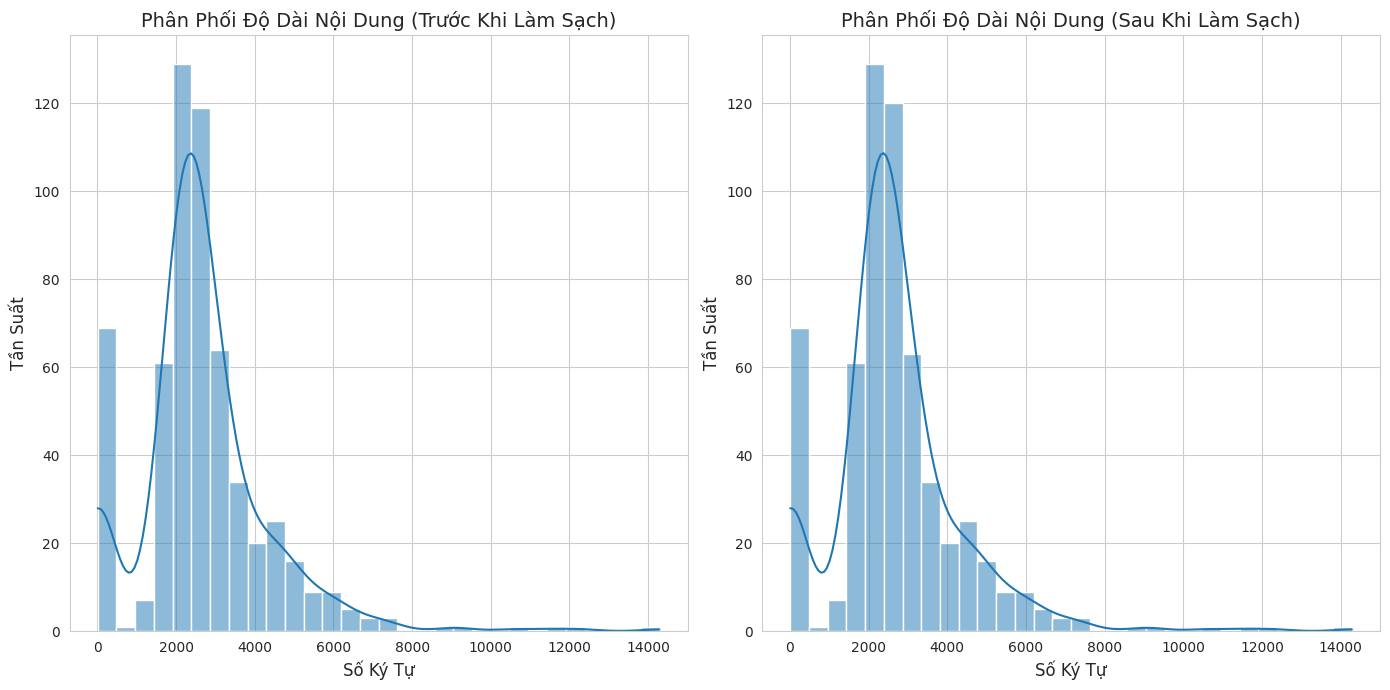

In [ ]:
# Trực quan hóa sự thay đổi trước và sau khi làm sạch cho độ dài nội dung
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df_clean['content_length'], kde=True, bins=30)
plt.title('Phân Phối Độ Dài Nội Dung (Trước Khi Làm Sạch)', fontsize=14)
plt.xlabel('Số Ký Tự', fontsize=12)
plt.ylabel('Tần Suất', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(data=df_clean['content_cleaned_length'], kde=True, bins=30)
plt.title('Phân Phối Độ Dài Nội Dung (Sau Khi Làm Sạch)', fontsize=14)
plt.xlabel('Số Ký Tự', fontsize=12)
plt.ylabel('Tần Suất', fontsize=12)

plt.tight_layout()
plt.show()

Xử lý cột Tags(String -> List) và Author


In [ ]:
# Xử lý cột tags
import re
df_clean['tags_list'] =  df['tags'].str.split(',').apply(lambda x: [tag.strip() for tag in x])
df_clean['tags_count'] = df_clean['tags_list'].apply(len)

# Xử lý cột author (loại bỏ phần trong ngoặc)
df_clean['author_cleaned'] = df_clean['author'].apply(lambda x: re.sub(r'\s*\(.*?\)', '', str(x)).strip())

print("Số lượng tags trung bình mỗi bài viết:", df_clean['tags_count'].mean())
print("Số lượng tác giả khác nhau sau khi làm sạch:", df_clean['author_cleaned'].nunique())
df_clean['author_cleaned']

Số lượng tags trung bình mỗi bài viết: 1.0
Số lượng tác giả khác nhau sau khi làm sạch: 206


0      p classNormal styletextalignrightstrongGiang H...
1                                    Đồ họaPeekaboo Kidz
2      p classNormal styletextalignrightstrongThu Thả...
3      p classNormal styletextalignrightstrongPhương ...
4                                              Đồ họaAFP
                             ...                        
575    p classNormal styletextalignrightstrongThu Thả...
576    p classNormal styletextalignrightstrongThu Thả...
577    p classNormal styletextalignrightstrongSơn Hàs...
578    p classNormal styletextalignrightstrongThu Thả...
579    p classNormal styletextalignrightstrongThu Thả...
Name: author_cleaned, Length: 580, dtype: object

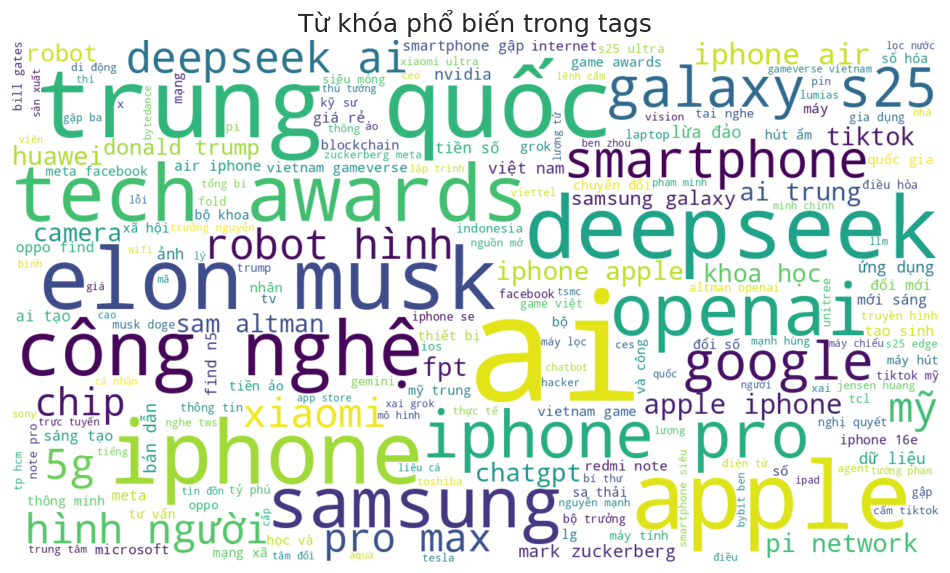

In [ ]:
# Flatten the list of lists into a single string for the wordcloud
all_tags = ', '.join([', '.join(tags) for tags in df_clean['tags_list']])
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=1280, height=720, background_color='white', max_words=200, contour_width=3).generate(all_tags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Từ khóa phổ biến trong tags', fontsize=18)
plt.show()


## Mã hoá dữ liệu


Mã hoá dữ liệu danh mục (category)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Khởi tạo OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Áp dụng OneHotEncoder cho cột 'category'
category_encoded = cat_encoder.fit_transform(df_clean[['category']])

# Tạo DataFrame từ kết quả mã hóa
category_encoded_df = pd.DataFrame(
    category_encoded,
    columns=[f"category_{cat}" for cat in cat_encoder.categories_[0]],
    index=df_clean.index
)

# Kết hợp dữ liệu đã mã hóa với DataFrame gốc
df_encoded = pd.concat([df_clean, category_encoded_df], axis=1)

print(f"Số đặc trưng sau khi mã hóa danh mục: {len(category_encoded_df.columns)}")
print("Các đặc trưng mã hóa danh mục:")
print(list(category_encoded_df.columns))

Số đặc trưng sau khi mã hóa danh mục: 16
Các đặc trưng mã hóa danh mục:
['category_Bàn tròn', 'category_Chân dung', 'category_Chính trị', 'category_Công nghệ', 'category_Cửa sổ tri thức', 'category_Hỏi  Đáp', 'category_Khoa học', 'category_Kỷ nguyên mới', 'category_Nhân vật', 'category_Thế giới tự nhiên', 'category_Thời sự', 'category_Tin tức', 'category_Trắc nghiệm', 'category_Vũ trụ', 'category_Đổi mới sáng tạo', 'category_Ứng dụng']


Mã hoá dữ liệu tags

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Xử lý NaN và chuyển danh sách tag thành chuỗi, mỗi tag cách nhau bằng dấu phẩy
df_clean['tags_text'] = df_clean['tags_list'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

# Khởi tạo CountVectorizer với n-gram (1,2) để giữ cả tag đơn và tag nhiều từ
tags_vectorizer = CountVectorizer(max_features=20, ngram_range=(1, 2), token_pattern=r'[^,]+')  # Tách theo dấu phẩy

# Áp dụng CountVectorizer
tags_encoded = tags_vectorizer.fit_transform(df_clean['tags_text']).toarray()

# Lấy danh sách các tag phổ biến
tag_names = tags_vectorizer.get_feature_names_out()

# Tạo DataFrame từ kết quả mã hóa
tags_encoded_df = pd.DataFrame(tags_encoded, columns=[f"tag_{tag.strip()}" for tag in tag_names], index=df_clean.index)

# Kết hợp dữ liệu tags đã mã hóa với DataFrame chính
df_encoded = pd.concat([df_encoded, tags_encoded_df], axis=1) # Assign the concatenated DataFrame to df_encoded

# Kiểm tra số lượng đặc trưng sau khi mã hóa
print(f"Số đặc trưng sau khi mã hóa tags: {len(tags_encoded_df.columns)}")
print("Các tags phổ biến đã mã hóa:")
print(list(tags_encoded_df.columns))


Số đặc trưng sau khi mã hóa tags: 20
Các tags phổ biến đã mã hóa:
['tag_deepseek', 'tag_deepseek trung quốc', 'tag_elon musk doge mỹ', 'tag_pi network', 'tag_pi network pi tiền ảo tiền số', 'tag_robot hình người', 'tag_tech awards số hóa', 'tag_tiktok mỹ', 'tag_xai elon musk grok mô hình ai', 'tag_xai grok grok 3 elon musk ai', 'tag_xgspon mạng tốc độ cao vnpt viettel', 'tag_xiaomi 15 smartphone cao cấp nhỏ gọn samsung galaxy s25 iphone 16 pro max', 'tag_xiaomi 15 ultra smartphone cao cấp smartphone chụp ảnh điện thoại máy ảnh', 'tag_xiaomi lei jun xiaomi 15 ultra', 'tag_xiaomi pad 7 series xiaomi pad 7 xiaomi pad 7 pro máy tính bảng ai', 'tag_xiaomi redmi note 14 pro xiaomi redmi', 'tag_xiaomi samsung apple counterpoint research thị phần smartphone smartphone', 'tag_xiaomi thiết bị gia dụng', 'tag_xiaomi wanbo wanbo tt xiaomi l1 pro máy chiếu', 'tag_xiaomi watch s4 smartwatch đồng hồ thông minh đồng hồ thông minh giá tốt']


Vector hoá dữ liệu văn bản

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo stopwords tiếng Việt
stopwords_vietnamese = [
    'và', 'là', 'của', 'có', 'trong', 'một', 'được', 'những', 'này', 'với',
    'cho', 'lại', 'sẽ', 'đã', 'ra', 'khi', 'nếu', 'thì', 'về', 'rằng', 'vậy'
]

# Khởi tạo TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,  # Giới hạn số lượng đặc trưng
    min_df=5,          # Chỉ lấy các từ xuất hiện trong ít nhất 5 văn bản
    max_df=0.8,        # Loại bỏ các từ xuất hiện trong hơn 80% văn bản
    stop_words=stopwords_vietnamese  # Loại bỏ stop words tiếng việt
)

# Áp dụng TF-IDF Vectorizer cho từng cột riêng biệt
tfidf_title_features = tfidf_vectorizer.fit_transform(df_clean['title']).toarray()
tfidf_description_features = tfidf_vectorizer.fit_transform(df_clean['description']).toarray()

# Tạo DataFrame từ kết quả vector hóa cho title và description
tfidf_title_df = pd.DataFrame(
    tfidf_title_features,
    columns=[f"tfidf_title_{word}" for word in tfidf_vectorizer.get_feature_names_out()],
    index=df_clean.index
)

tfidf_description_df = pd.DataFrame(
    tfidf_description_features,
    columns=[f"tfidf_description_{word}" for word in tfidf_vectorizer.get_feature_names_out()],
    index=df_clean.index
)

# Kết hợp các đặc trưng TF-IDF với DataFrame encoded
df_encoded = pd.concat([df_encoded, tfidf_title_df, tfidf_description_df], axis=1)

# Kiểm tra số đặc trưng sau khi vector hóa
print(f"Số đặc trưng sau khi vector hóa title và description: {len(tfidf_title_df.columns) + len(tfidf_description_df.columns)}")
df_encoded

Số đặc trưng sau khi vector hóa title và description: 200


title  \
0    Bên trong Trung tâm điều khiển và vận hành vệ ...   
1       Điều gì xảy ra nếu hệ Mặt Trời chỉ có Trái Đất   
2    NASA phóng kính viễn vọng không gian quét toàn...   
3                   Nói tre bền hơn thép có đúng không   
4      Công nghệ nhận diện gương mặt hoạt động thế nào   
..                                                 ...   
575           Tàu đổ bộ tư nhân Mỹ chết trên Mặt Trăng   
576                 Thực vật có hoa duy nhất dưới biển   
577  Đề xuất luật hóa về mã vạch để truy xuất nguồn...   
578     Phát hiện 128 mặt trăng mới quay quanh sao Thổ   
579  Nhật Bản xây trạm dừng tàu đầu tiên bằng công ...   

                                           description                date  \
0    Hệ thống mặt đất tại Khu công nghệ cao Hòa Lạc... 2025-03-12 11:00:00   
1    Nếu Trái Đất trở thành hành tinh duy nhất tron... 2025-02-04 00:00:00   
2    Tên lửa Falcon 9 mang theo kính viễn vọng SPHE... 2025-03-13 11:21:00   
3    Tre có tính chất đặc tính rất khác biệt nên nh... 2025-02-20 00:00:00   
4    Dựa trên so sánh đặc trưng trên gương mặt một ... 2025-02-08 10:00:00   
..                                                 ...                 ...   
575  Tàu đổ bộ Athena của công ty Intuitive Machine... 2025-03-09 10:55:00   
576  Khoảng 100 triệu năm trước cỏ biển xuống dưới ... 2025-03-09 20:00:00   
577  Bộ Khoa học và Công nghệ đề xuất luật hóa quy ... 2025-03-06 14:14:00   
578  Với tổng cộng 274 mặt trăng sao Thổ hiện là hà... 2025-03-13 18:46:00   
579  Công ty Đường sắt Tây Nhật Bản JR West sẽ thay... 2025-03-17 10:59:00   

              category                                            content  \
0             Ứng dụng  Trung tâm Vũ trụ Việt Nam VNSC tại Hòa Lạc đượ...   
1             Khoa học                                Đồ họaPeekaboo Kidz   
2               Vũ trụ  Ngoài SPHEREx kính viễn vọng được thiết kế để ...   
3          Trắc nghiệm                                Phương LinhTổng hợp   
4             Khoa học                                        \nĐồ họaAFP   
..                 ...                                                ...   
575             Vũ trụ  Sau khoảng một ngày đánh giá công ty Mỹ Intuit...   
576  Thế giới tự nhiên  Trên đất liền hoa có mặt khắp nơi Trong khi dư...   
577            Tin tức  Bộ Khoa học và Công nghệ đang dự thảo Luật sửa...   
578             Vũ trụ  Sao Thổ và sao Mộc từng cạnh tranh danh hiệu v...   
579           Khoa học  Công trình mới nằm trên tuyến chính JR Kisei t...   

                                                author  \
0    p classNormal styletextalignrightstrongGiang H...   
1                                  Đồ họaPeekaboo Kidz   
2    p classNormal styletextalignrightstrongThu Thả...   
3    p classNormal styletextalignrightstrongPhương ...   
4                                            Đồ họaAFP   
..                                                 ...   
575  p classNormal styletextalignrightstrongThu Thả...   
576  p classNormal styletextalignrightstrongThu Thả...   
577  p classNormal styletextalignrightstrongSơn Hàs...   
578  p classNormal styletextalignrightstrongThu Thả...   
579  p classNormal styletextalignrightstrongThu Thả...   

                                                  tags     group  \
0    việt nam lotusat1 trung tâm điều khiển và vận ...  Khoa học   
1                       trái đất hệ mặt trời hành tinh  Khoa học   
2       nasa kính viễn vọng vệ tinh mặt trời phóng tàu  Khoa học   
3                        tre tre bền hơn thép vật liệu  Khoa học   
4                    nhận diện gương mặt cơ sở dữ liệu  Khoa học   
..                                                 ...       ...   
575  mặt trăng hố trũng tàu đổ bộ mỹ nasa intuitive...  Khoa học   
576  cỏ biển thực vật nở hoa ong mật sinh vật biển ...  Khoa học   
577      mã vạch sản phẩm truy xuất nguồn gốc hàng hóa  Khoa học   
578  mặt trăng sao thổ sao mộc trái đất hệ mặt trời...  Khoa học   
579  nhật bản trạm dừng ga tàu tàu điện in 3d

In [ ]:
# Tạo biến nhị phân cho ngày cuối tuần
df_encoded['is_weekend'] = df_encoded['day'].apply(lambda x: 1 if x >= 5 else 0)

# Mã hóa giờ trong ngày thành các khoảng thời gian
def encode_hour_period(hour):
    if 5 <= hour < 9:
        return 'early_morning'
    elif 9 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 14:
        return 'lunch'
    elif 14 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 20:
        return 'evening'
    else:
        return 'night'

df_encoded['time_period'] = df_encoded['hour'].apply(encode_hour_period)

# Mã hóa time_period sử dụng One-Hot Encoding
time_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
time_encoded = time_encoder.fit_transform(df_encoded[['time_period']])

# Tạo DataFrame từ kết quả mã hóa
time_encoded_df = pd.DataFrame(
    time_encoded,
    columns=[f"time_{period}" for period in time_encoder.categories_[0]],
    index=df_encoded.index
)

# Kết hợp dữ liệu đã mã hóa với DataFrame
df_encoded = pd.concat([df_encoded, time_encoded_df], axis=1)

print(f"Số đặc trưng sau khi mã hóa khoảng thời gian: {len(time_encoded_df.columns)}")

Số đặc trưng sau khi mã hóa khoảng thời gian: 6


In [ ]:
# Tỷ lệ giữa độ dài tiêu đề và nội dung
df_encoded['title_content_ratio'] = df_encoded['title_length'] / df_encoded['content_length']

# Tỷ lệ giữa độ dài mô tả và nội dung
df_encoded['description_content_ratio'] = df_encoded['description_length'] / df_encoded['content_length']

# Đặc trưng tương tác giữa thời gian và danh mục
for category in cat_encoder.categories_[0]:
    category_col = f"category_{category}"
    df_encoded[f"weekend_x_{category_col}"] = df_encoded['is_weekend'] * df_encoded[category_col]

In [ ]:
# Tính tỷ lệ tags phổ biến trên tổng số tags
df_encoded['popular_tags_ratio'] = df_encoded[tags_encoded_df.columns].sum(axis=1) / df_encoded['tags_count']

# Tính số lượng từ hiếm trong tiêu đề
# (dựa trên số lượng TF-IDF features đã chọn)
# Combine tfidf_title_df and tfidf_description_df into tfidf_df
tfidf_df = pd.concat([tfidf_title_df, tfidf_description_df], axis=1)
df_encoded['title_rare_words'] = df_encoded['title_length'] - df_encoded[tfidf_df.columns].sum(axis=1)

In [ ]:
# df_encoded.head(5)
numeric_features = ['content_length', 'description_length', 'title_length',
                    'tags_count', 'title_content_ratio', 'description_content_ratio',
                     'month', 'day', 'hour', 'title_rare_words',
                    'is_weekend', 'popular_tags_ratio', 'time_period']
df_encoded[numeric_features].head(5)

content_length  description_length  title_length  tags_count  \
0            4892                 206            59           1   
1              19                 179            46           1   
2            2865                 140            58           1   
3              19                 129            34           1   
4              10                 183            47           1   

   title_content_ratio  description_content_ratio  month   day  hour  \
0             0.012061                   0.042110    3.0  12.0  11.0   
1             2.421053                   9.421053    2.0   4.0   0.0   
2             0.020244                   0.048866    3.0  13.0  11.0   
3             1.789474                   6.789474    2.0  20.0   0.0   
4             4.700000                  18.300000    2.0   8.0  10.0   

   title_rare_words  is_weekend  popular_tags_ratio time_period  
0         52.993122           1                 0.0     morning  
1         40.220705           0                 0.0       night  
2         53.783600           1                 0.0     morning  
3         29.881514           1                 0.0       night  
4         41.427356           1                 0.0     morning

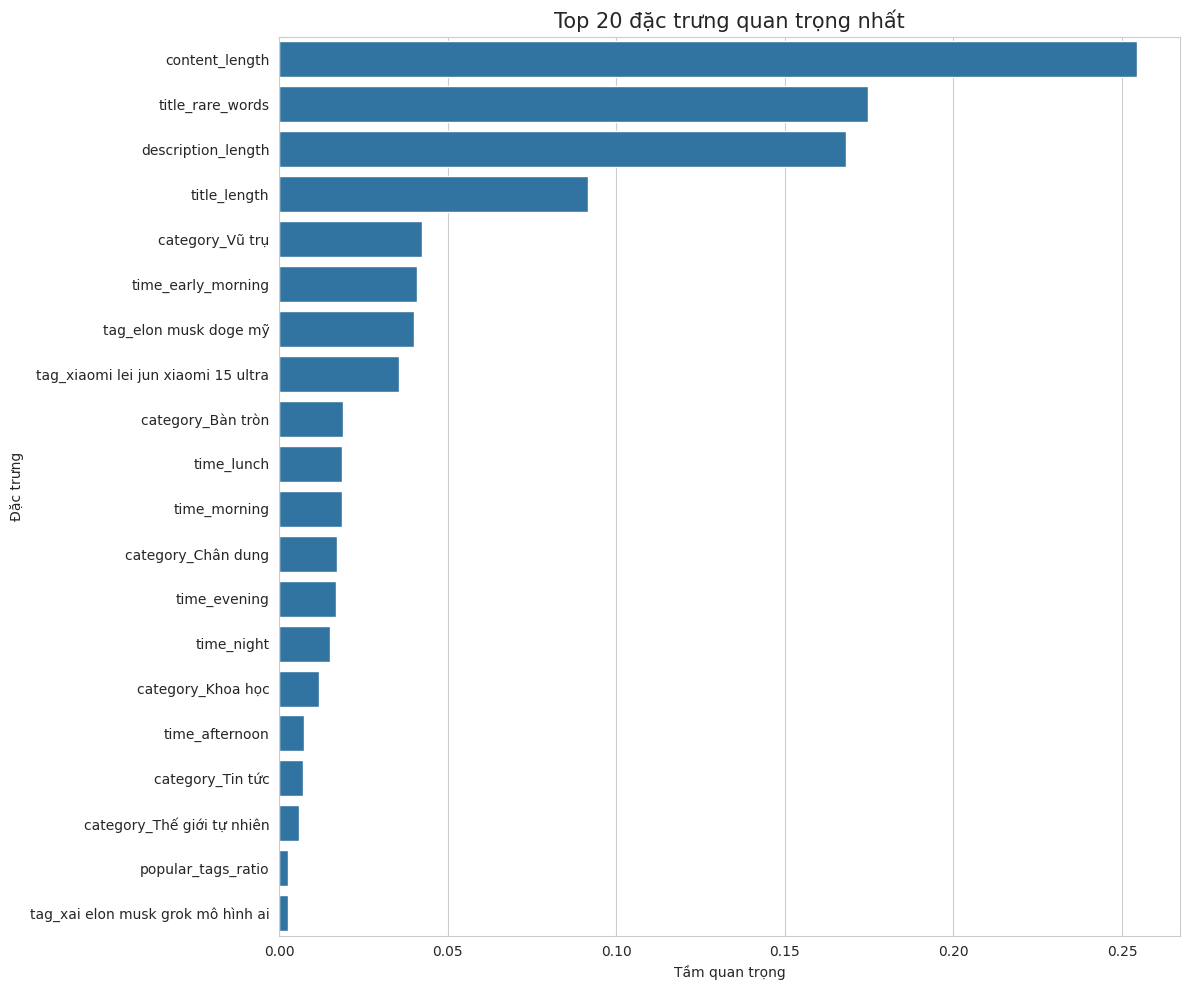

Top 20 đặc trưng quan trọng nhất:
['content_length', 'title_rare_words', 'description_length', 'title_length', 'category_Vũ trụ', 'time_early_morning', 'tag_elon musk doge mỹ', 'tag_xiaomi lei jun xiaomi 15 ultra', 'category_Bàn tròn', 'time_lunch', 'time_morning', 'category_Chân dung', 'time_evening', 'time_night', 'category_Khoa học', 'time_afternoon', 'category_Tin tức', 'category_Thế giới tự nhiên', 'popular_tags_ratio', 'tag_xai elon musk grok mô hình ai']


In [ ]:
# Fix for the RandomForest error in cell #32
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Chọn các đặc trưng cho việc phân tích feature importance
numeric_features = ['content_length', 'description_length', 'title_length',
                    'tags_count', 'title_rare_words',
                      'popular_tags_ratio']

# Thêm các đặc trưng đã mã hóa
encoded_features = list(category_encoded_df.columns) + list(tags_encoded_df.columns) + list(time_encoded_df.columns)
selected_features = numeric_features + encoded_features

# Chuẩn hóa đặc trưng số
X_features = df_encoded[selected_features].copy()

# Fix: xử lý giá trị vô cùng (infinity) - loại bỏ các đặc trưng có chứa tỉ lệ
# Thay thế tất cả các giá trị vô cùng bằng NaN và sau đó điền giá trị 0
X_features.replace([np.inf, -np.inf], np.nan, inplace=True)
X_features.fillna(0, inplace=True)

y_target = df_encoded['nums_of_comments']

# Tạo pipeline với Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Huấn luyện mô hình
pipeline.fit(X_features, y_target)

# Lấy feature importance
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Tạo DataFrame chứa tầm quan trọng của các đặc trưng
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Trực quan hóa top đặc trưng quan trọng
plt.figure(figsize=(12, 10))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 đặc trưng quan trọng nhất', fontsize=15)
plt.xlabel('Tầm quan trọng')
plt.ylabel('Đặc trưng')
plt.tight_layout()
plt.show()

# Lưu lại top đặc trưng quan trọng
top_features = importance_df.head(20)['Feature'].tolist()
print("Top 20 đặc trưng quan trọng nhất:")
print(top_features)

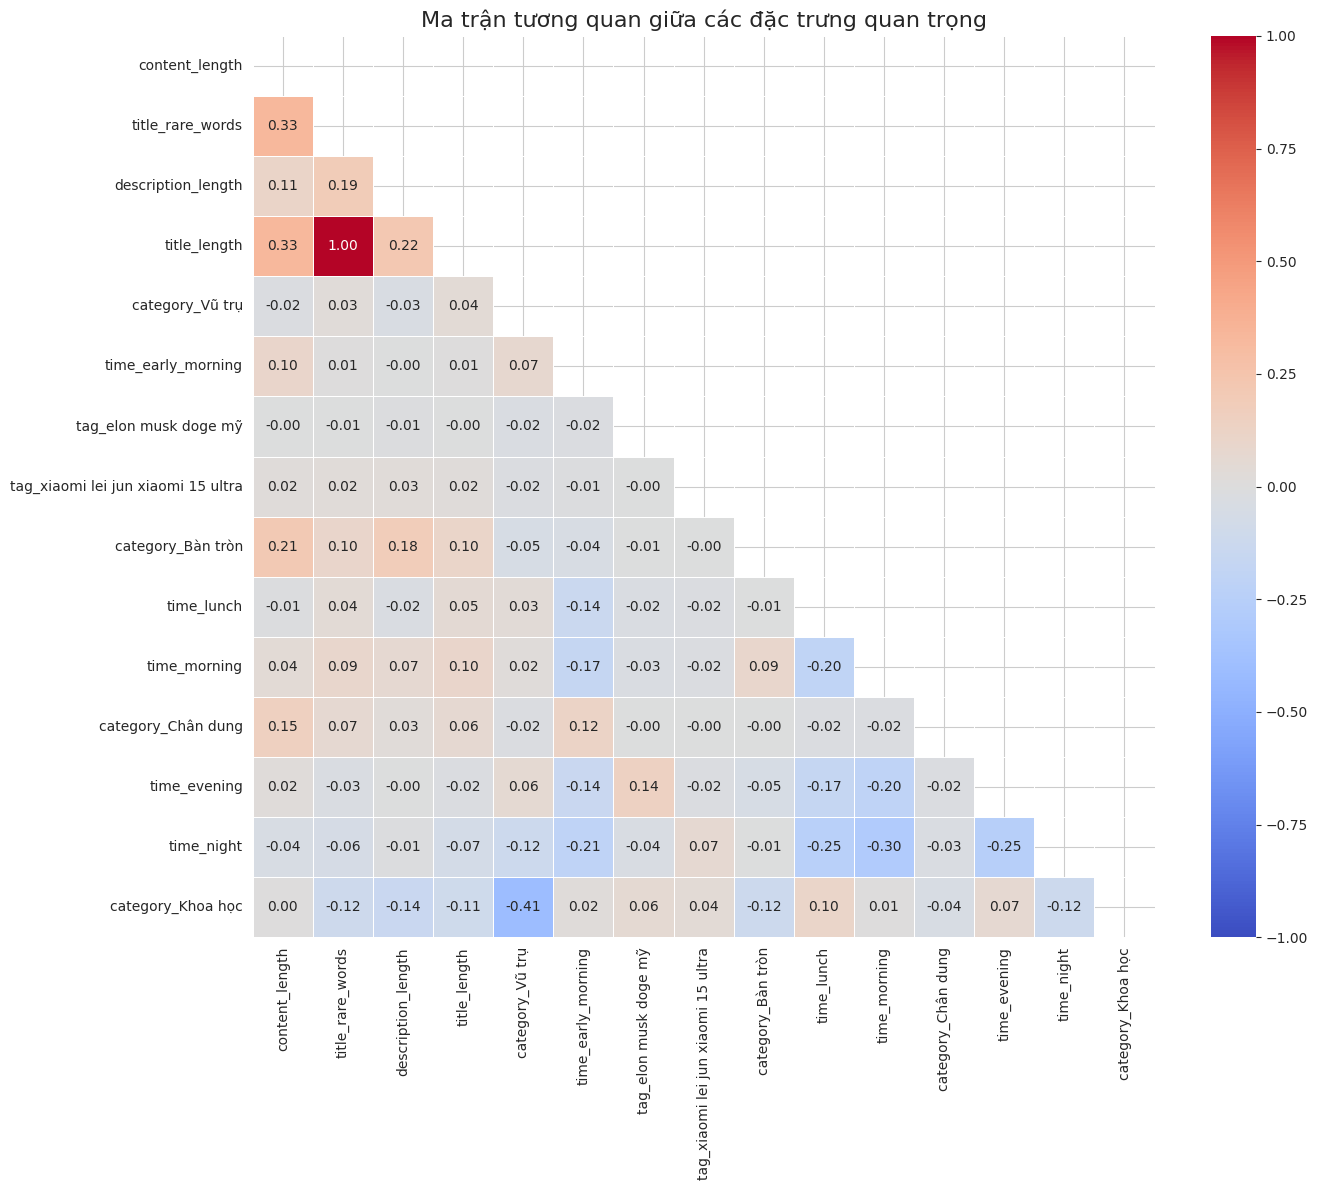

In [ ]:
# Chọn các đặc trưng từ top 15 feature importance để phân tích tương quan
corr_features = [f for f in top_features[:15] if f in X_features.columns]

# Tính ma trận tương quan
correlation_matrix = X_features[corr_features].corr()

# Trực quan hóa ma trận tương quan
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm',
            fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các đặc trưng quan trọng', fontsize=16)
plt.tight_layout()
plt.show()

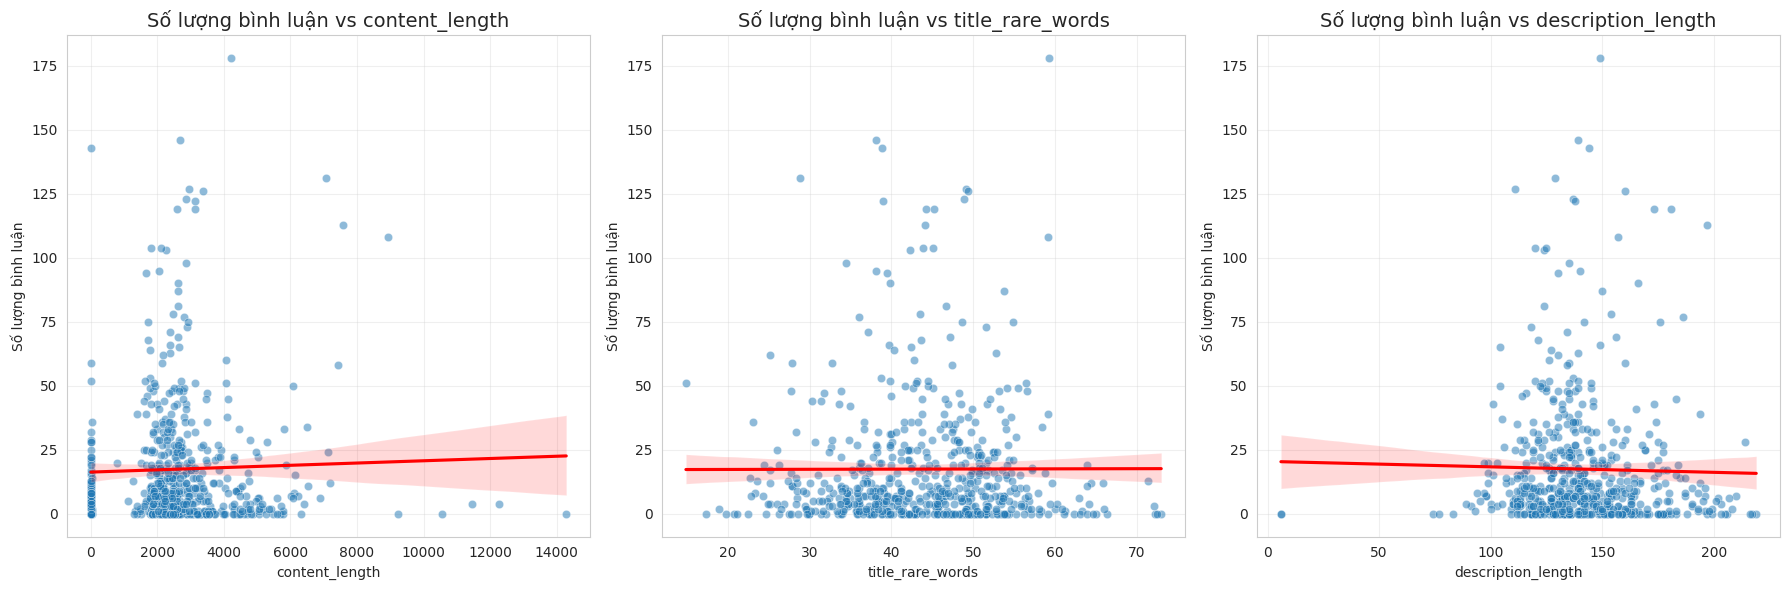

In [ ]:
# Chọn top 3 đặc trưng số quan trọng nhất
top_numeric_features = [feat for feat in top_features if feat in numeric_features][:3]

# Tạo biểu đồ scatter cho các đặc trưng quan trọng
fig, axes = plt.subplots(1, len(top_numeric_features), figsize=(18, 6))

for i, feature in enumerate(top_numeric_features):
    sns.scatterplot(data=df_encoded, x=feature, y='nums_of_comments', ax=axes[i], alpha=0.5)
    # Thêm đường hồi quy tuyến tính
    sns.regplot(data=df_encoded, x=feature, y='nums_of_comments',
                ax=axes[i], scatter=False, color='red')
    axes[i].set_title(f'Số lượng bình luận vs {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Số lượng bình luận')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

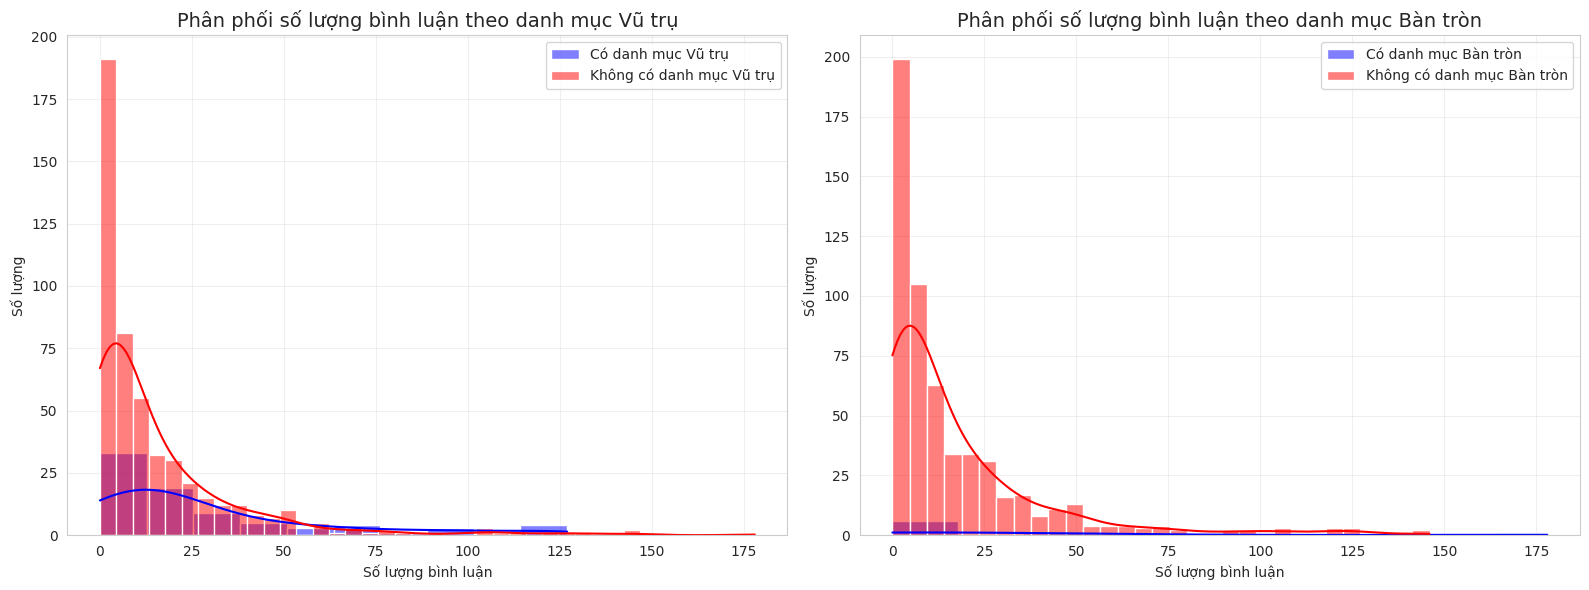

In [ ]:
# Kiểm tra phân phối của số lượng bình luận theo các đặc trưng phân loại
# Chọn top 2 đặc trưng danh mục quan trọng nhất
top_category_features = [feat for feat in top_features if feat.startswith('category_')][:2]

fig, axes = plt.subplots(1, len(top_category_features), figsize=(16, 6))

for i, feature in enumerate(top_category_features):
    category_name = feature.replace('category_', '')

    # Chia dữ liệu thành hai nhóm: có và không có danh mục này
    has_category = df_encoded[df_encoded[feature] == 1]['nums_of_comments']
    no_category = df_encoded[df_encoded[feature] == 0]['nums_of_comments']

    # Vẽ biểu đồ phân phối
    sns.histplot(has_category, ax=axes[i], color='blue', label=f'Có danh mục {category_name}', alpha=0.5, kde=True)
    sns.histplot(no_category, ax=axes[i], color='red', label=f'Không có danh mục {category_name}', alpha=0.5, kde=True)

    axes[i].set_title(f'Phân phối số lượng bình luận theo danh mục {category_name}', fontsize=14)
    axes[i].set_xlabel('Số lượng bình luận')
    axes[i].set_ylabel('Số lượng')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

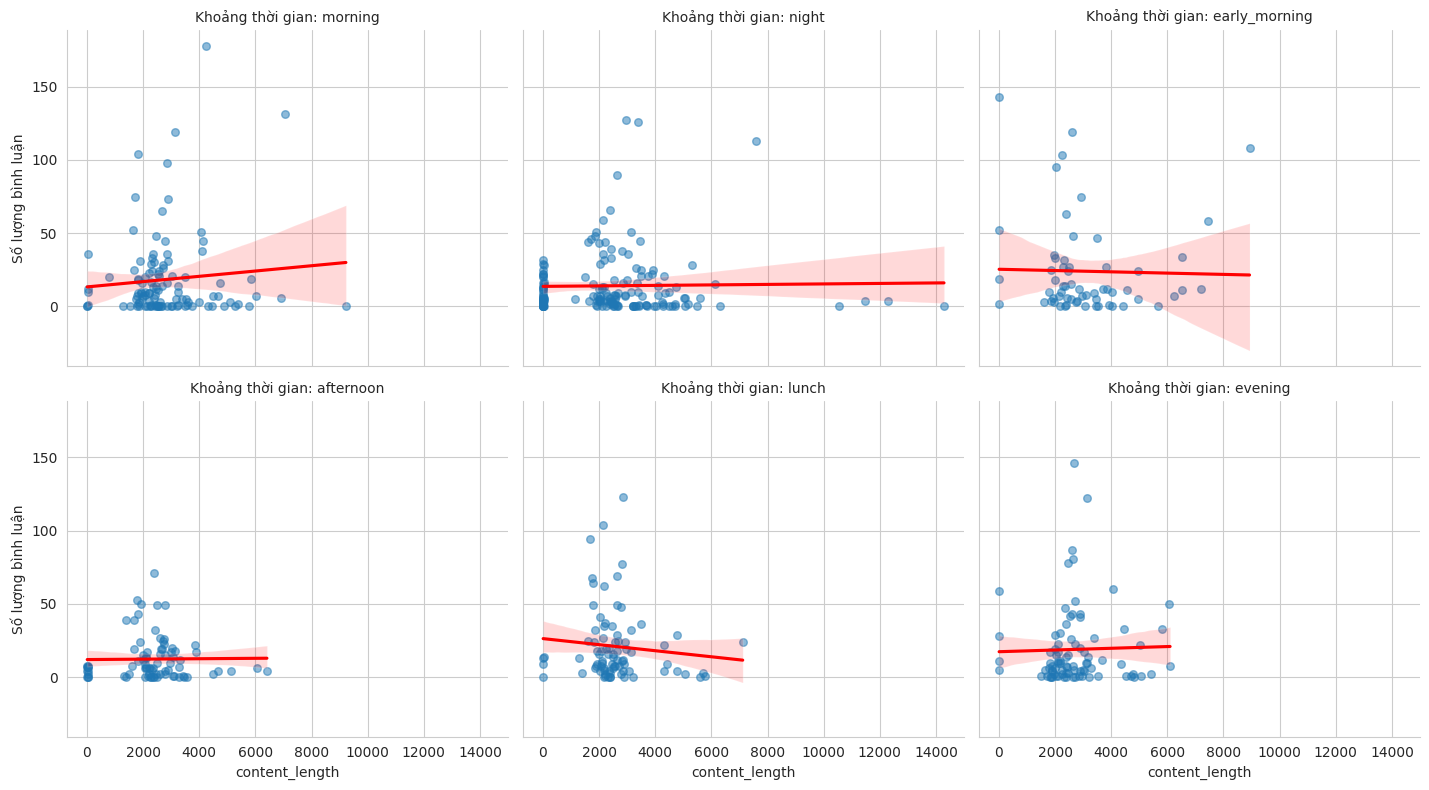

In [ ]:
# 6.4. Linear Model Plot (lmplot)

# Phân tích mối quan hệ giữa đặc trưng quan trọng và số lượng bình luận
# theo các nhóm thời gian khác nhau

# Chọn đặc trưng số quan trọng nhất
top_numeric_feature = top_numeric_features[0]

# Tạo biểu đồ lmplot để phân tích theo khoảng thời gian
plt.figure(figsize=(14, 10))
g = sns.lmplot(
    data=df_encoded,
    x=top_numeric_feature,
    y='nums_of_comments',
    col='time_period',  # Chia theo khoảng thời gian
    col_wrap=3,  # Số cột trong lưới
    height=4,
    aspect=1.2,
    scatter_kws={'alpha': 0.5, 's': 30},
    line_kws={'color': 'red'}
)

g.set_axis_labels(f"{top_numeric_feature}", "Số lượng bình luận")
g.set_titles("Khoảng thời gian: {col_name}")
g.tight_layout()
plt.show()

<Figure size 1600x1400 with 0 Axes>

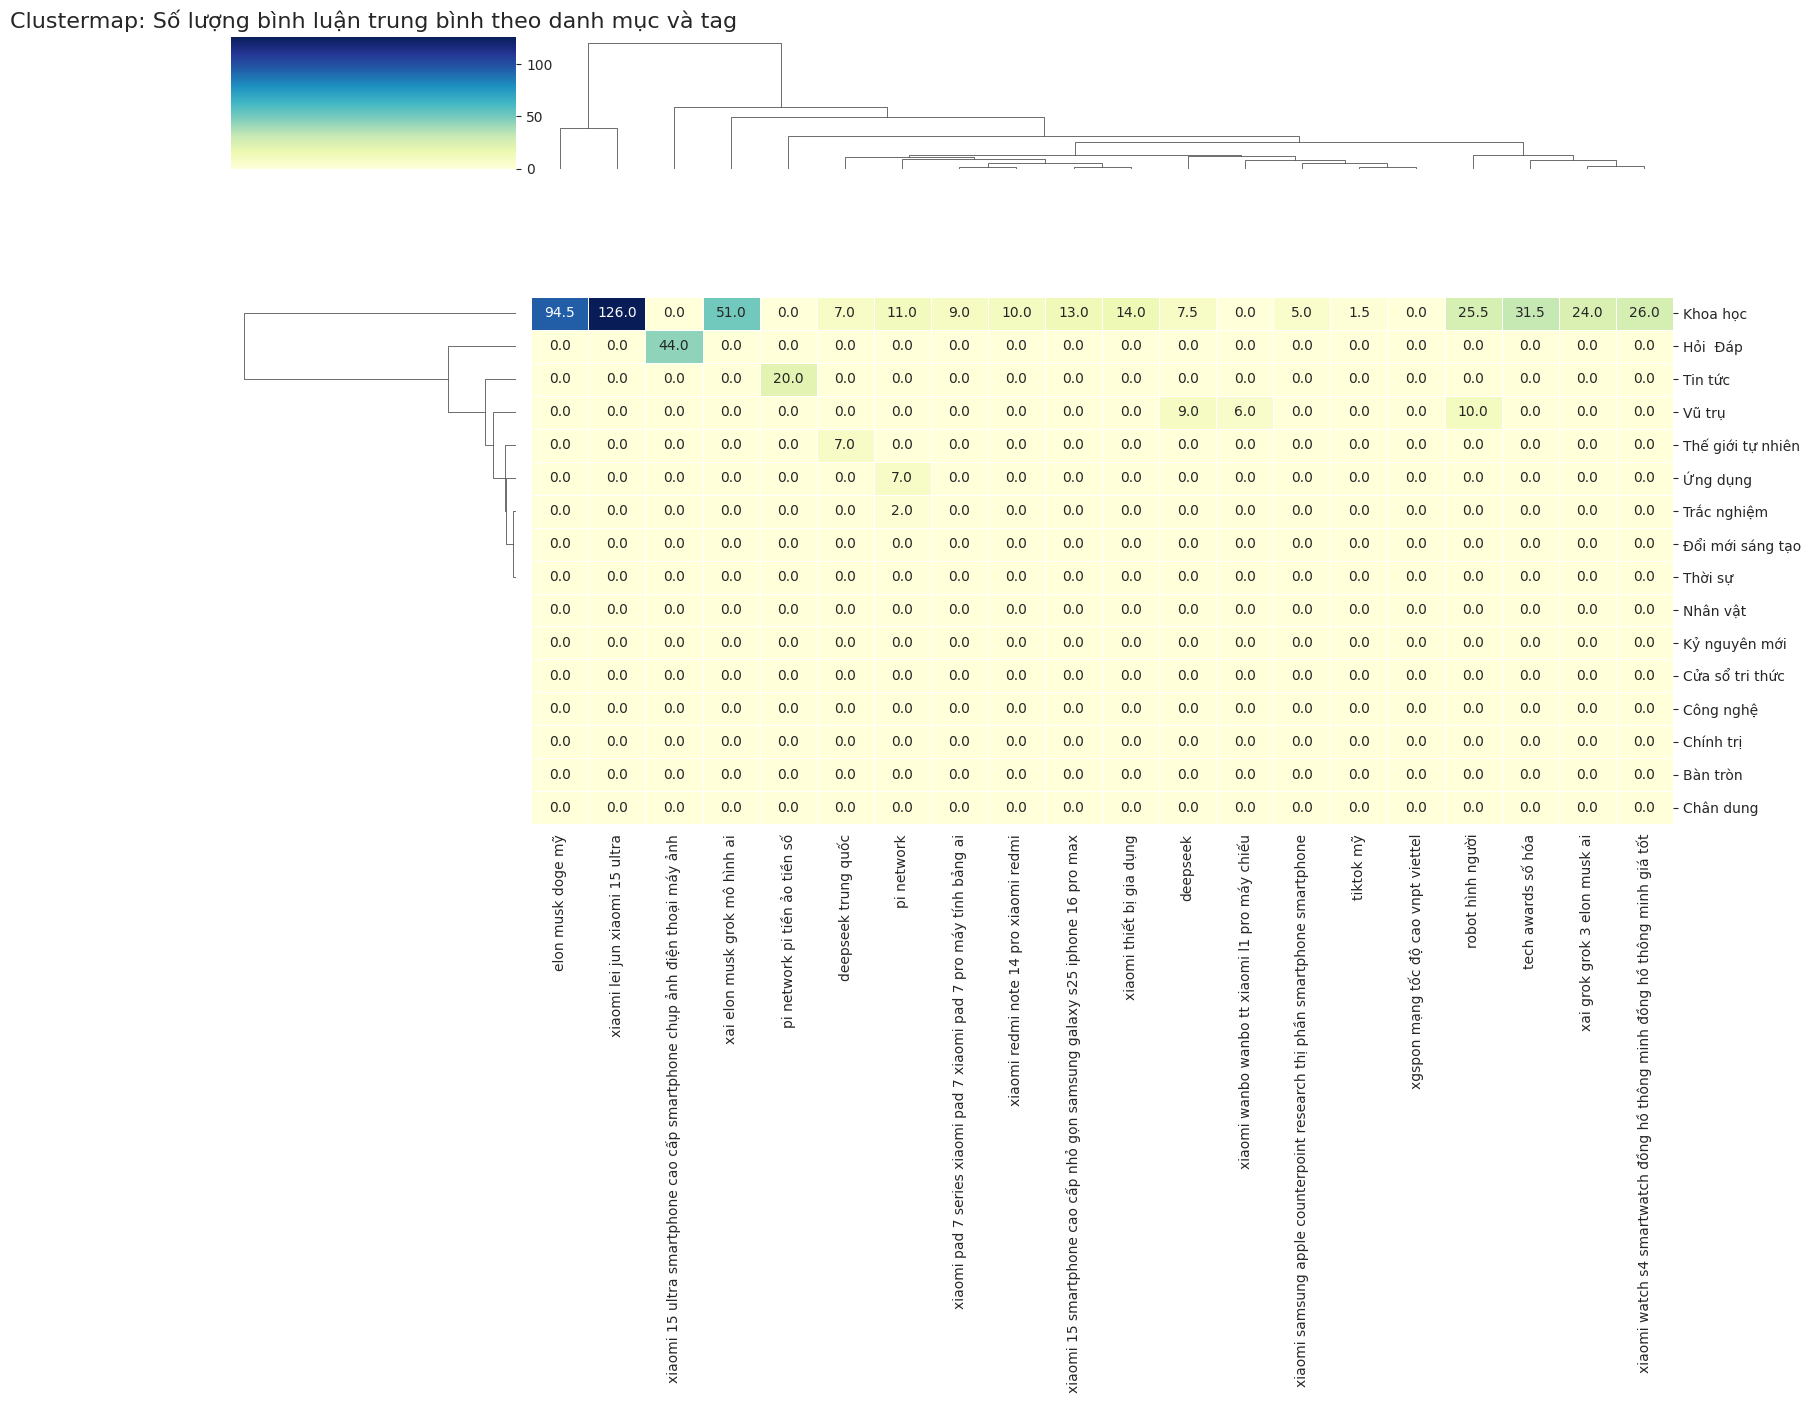

In [ ]:
# Phân tích mối quan hệ giữa các danh mục và tags

# Tạo ma trận tần suất giữa danh mục và tags
category_columns = [col for col in df_encoded.columns if col.startswith('category_')]
tag_columns = [col for col in df_encoded.columns if col.startswith('tag_')]

# Tính trung bình số lượng bình luận cho mỗi kết hợp danh mục-tag
category_tag_matrix = np.zeros((len(category_columns), len(tag_columns)))

for i, cat in enumerate(category_columns):
    for j, tag in enumerate(tag_columns):
        # Các bài viết có cả danh mục và tag này
        subset = df_encoded[(df_encoded[cat] == 1) & (df_encoded[tag] == 1)]
        if len(subset) > 0:
            category_tag_matrix[i, j] = subset['nums_of_comments'].mean()

# Chuyển đổi ma trận thành DataFrame
category_tag_df = pd.DataFrame(
    category_tag_matrix,
    index=[col.replace('category_', '') for col in category_columns],
    columns=[col.replace('tag_', '') for col in tag_columns]
)

# Trực quan hóa bằng clustermap
plt.figure(figsize=(16, 14))
sns.clustermap(
    category_tag_df,
    cmap="YlGnBu",
    figsize=(16, 14),
    row_cluster=True,
    col_cluster=True,
    linewidths=0.5,
    annot=True,
    fmt='.1f'
)
plt.title('Clustermap: Số lượng bình luận trung bình theo danh mục và tag', fontsize=16)
plt.tight_layout()
plt.show()

Với 2 cụm, Silhouette Score là: 0.1900
Với 3 cụm, Silhouette Score là: 0.2392
Với 4 cụm, Silhouette Score là: 0.2449
Với 5 cụm, Silhouette Score là: 0.2121
Với 6 cụm, Silhouette Score là: 0.2650
Với 7 cụm, Silhouette Score là: 0.2964
Với 8 cụm, Silhouette Score là: 0.3315
Với 9 cụm, Silhouette Score là: 0.2932
Với 10 cụm, Silhouette Score là: 0.2877


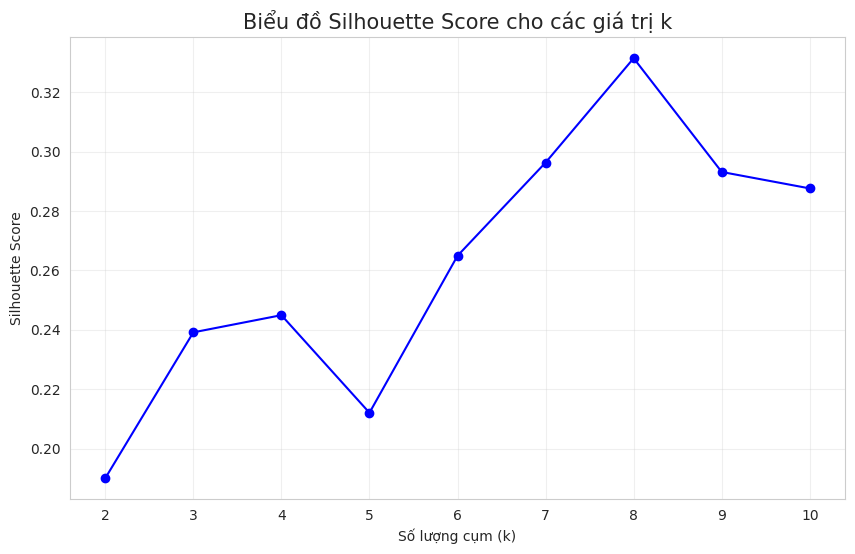

Thông tin các cụm:
         nums_of_comments  content_length  tags_count  title_length  category  \
cluster                                                                         
0                   17.62         3340.88         1.0         57.06  Khoa học   
1                   16.19         2051.82         1.0         40.82  Khoa học   
2                   21.01         2595.90         1.0         49.92  Khoa học   

         is_weekend   hour  
cluster                     
0              0.91  11.90  
1              0.92  12.27  
2              0.90  12.58  


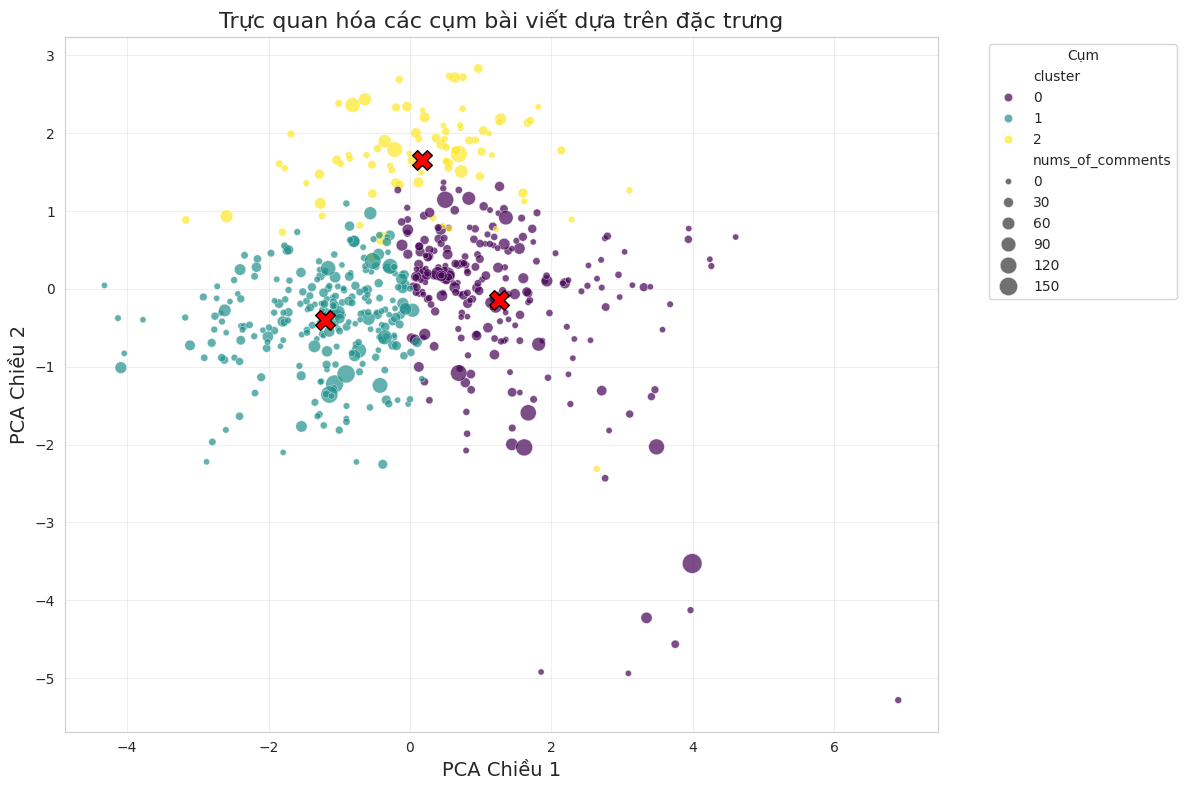

In [ ]:
# 7. Phân tích Clustering

## 7.1. Chuẩn bị dữ liệu cho clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Chọn các đặc trưng cho clustering
cluster_features = top_features[:10].copy()
cluster_features = [f for f in cluster_features if f in X_features.columns]

# Chuẩn hóa dữ liệu
X_cluster = X_features[cluster_features].copy()
X_cluster.replace([np.inf, -np.inf], np.nan, inplace=True)
X_cluster.fillna(0, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

## 7.2. Tìm số lượng cụm tối ưu
# Tính silhouette score cho các giá trị k khác nhau
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Với {k} cụm, Silhouette Score là: {silhouette_avg:.4f}")

# Trực quan hóa silhouette score
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-', color='blue')
plt.title('Biểu đồ Silhouette Score cho các giá trị k', fontsize=15)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()

## 7.3. Xây dựng và phân tích mô hình clustering
# Chọn số cụm tối ưu (giả sử k=3 có silhouette score cao nhất)
optimal_k = 3  # Điều chỉnh dựa vào kết quả từ bước trước
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Thêm nhãn cụm vào DataFrame
df_encoded['cluster'] = cluster_labels

# Phân tích các cụm
cluster_profile = df_encoded.groupby('cluster').agg({
    'nums_of_comments': 'mean',
    'content_length': 'mean',
    'tags_count': 'mean',
    'title_length': 'mean',
    'category': lambda x: x.value_counts().index[0],  # Danh mục phổ biến nhất
    'is_weekend': 'mean',
    'hour': 'mean'
}).round(2)

print("Thông tin các cụm:")
print(cluster_profile)

## 7.4. Trực quan hóa các cụm
# Sử dụng PCA để giảm chiều dữ liệu xuống 2D cho việc trực quan hóa
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Tạo DataFrame cho kết quả PCA
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = cluster_labels
pca_df['nums_of_comments'] = df_encoded['nums_of_comments'].values

# Trực quan hóa các cụm
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='cluster',
    size='nums_of_comments',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7
)

# Hiển thị tâm cụm
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='X',
    s=200,
    color='red',
    edgecolor='black'
)

plt.title('Trực quan hóa các cụm bài viết dựa trên đặc trưng', fontsize=16)
plt.xlabel('PCA Chiều 1', fontsize=14)
plt.ylabel('PCA Chiều 2', fontsize=14)
plt.legend(title='Cụm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


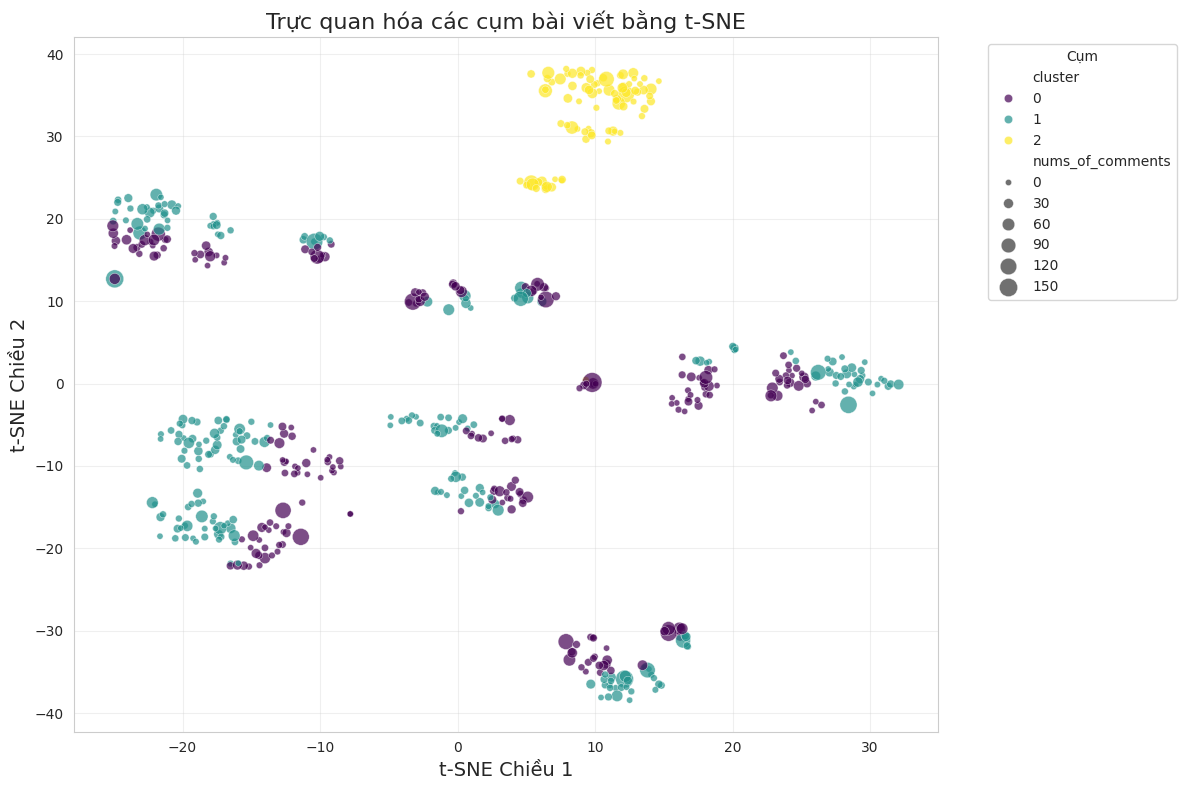

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Chọn các đặc trưng cho t-SNE
tsne_features = top_features[:15].copy()
tsne_features = [f for f in tsne_features if f in X_features.columns]

# Chuẩn hóa dữ liệu
X_tsne = X_features[tsne_features].copy()
scaler = StandardScaler()
X_tsne_scaled = scaler.fit_transform(X_tsne)

# Áp dụng t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X_tsne_scaled)

# Tạo DataFrame cho kết quả t-SNE
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['nums_of_comments'] = df_encoded['nums_of_comments'].values
tsne_df['category'] = df_encoded['category'].values

tsne_df['cluster'] = df_encoded['cluster'].values
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='cluster',
    size='nums_of_comments',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Trực quan hóa các cụm bài viết bằng t-SNE', fontsize=16)
plt.xlabel('t-SNE Chiều 1', fontsize=14)
plt.ylabel('t-SNE Chiều 2', fontsize=14)
plt.legend(title='Cụm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()
# Lưu DataFrame đã xử lý vào file CSV